# <h1><center>ROAD TRAFFIC ACCIDENT PROJECT</center></h1>

# 771762: BIG DATA AND DATA MINING

# Data Analysis, Cleaning, Clustering, Outliers and Modeling

# 1.0 IMPORTING NECESSARY LIBRARIES

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import folium
import itertools
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler


In [2]:
connect=sqlite3.connect("accident_data_v1.0.0_2023.db")

In [3]:
connect

In [4]:
cur = connect.cursor()

In [5]:
cur

# 1.1 CREATING LIST OF EACH TABLE

# Accident List

In [6]:
Accident_col_info=cur.execute(f"PRAGMA table_info(accident)")
Accident_info=Accident_col_info.fetchall()
Accident_info

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [7]:
accident_list = []
for col in Accident_info:     
    accident_list.append(col[1])  
print(accident_list)

['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']


# Vehicle List

In [8]:
Vehicle_col_info=cur.execute(f"PRAGMA table_info(vehicle)")
Vehicle_info=Vehicle_col_info.fetchall()
Vehicle_info

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [9]:
vehicle_list = []
for col in Vehicle_info:     
    vehicle_list.append(col[1])  
print(vehicle_list)

['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'generic_make_model', 'driver_imd_decile', 'driver_home_area_type']


# Casualty_list

In [10]:
Casualty_col_info=cur.execute(f"PRAGMA table_info(casualty)")
Casualty_info=Casualty_col_info.fetchall()
Casualty_info

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [11]:
casualty_list = []
for col in Casualty_info:     
    casualty_list.append(col[1])  
print(casualty_list)

['casualty_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']


# lsoa_List

In [12]:
Lsoa_col_info=cur.execute(f"PRAGMA table_info(lsoa)")
Lsoa_info=Lsoa_col_info.fetchall()
Lsoa_info

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

In [13]:
Lsoa_list = []
for col in Lsoa_info:     
    Lsoa_list.append(col[1])  
print(Lsoa_list)

['objectid', 'lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'shape__area', 'shape__length', 'globalid']


# 1.2 COUNTING VALUES IN EACH TABLE

In [14]:
Acc_count = cur.execute('SELECT COUNT(*) from accident WHERE accident_year = 2020')
Accident_count =Acc_count.fetchone()
Accident_count

(91199,)

In [15]:
Veh_count = cur.execute('SELECT COUNT(*) from vehicle WHERE accident_year = 2020')
Vehicle_count =Veh_count.fetchone()
Vehicle_count

(167375,)

In [16]:
Cas_count = cur.execute('SELECT COUNT(*) from casualty WHERE accident_year = 2020')
Casualty_count =Cas_count.fetchone()
Casualty_count

(115584,)

In [17]:
Is_count = cur.execute('SELECT COUNT(*) from lsoa')
Isoa_count =Is_count.fetchone()
Isoa_count

(34378,)

# 1.3 STORING DATA FROM ACCIDENT YEAR 2020

In [18]:
Accident_Data_2020= pd.read_sql_query('SELECT * FROM accident WHERE accident_year =2020;', connect)
Accident_Data_2020

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [19]:
Vehicle_Data_2020= pd.read_sql_query('SELECT * FROM Vehicle WHERE accident_year =2020;', connect)
Vehicle_Data_2020

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [20]:
Casualty_Data_2020= pd.read_sql_query('SELECT * FROM Casualty WHERE accident_year =2020;', connect)
Casualty_Data_2020

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [21]:
Lsoa_Data_2020= pd.read_sql_query('SELECT * FROM lsoa;', connect)
Lsoa_Data_2020

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


# 1.4 CREATING PANDAS DATAFRAME

In [22]:
Accident_DataFrame= pd.DataFrame(Accident_Data_2020, columns=accident_list)
Accident_DataFrame

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [23]:
Vehicle_DataFrame= pd.DataFrame(Vehicle_Data_2020, columns=vehicle_list)
Vehicle_DataFrame

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [24]:
Casualty_DataFrame= pd.DataFrame(Casualty_Data_2020, columns=casualty_list)
Casualty_DataFrame

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [25]:
Lsoa_DataFrame= pd.DataFrame(Lsoa_Data_2020, columns=Lsoa_list)
Lsoa_DataFrame

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


# 2.0 CLEANING

In [26]:
Long_lat = Accident_DataFrame[['longitude','latitude']]
Long_lat

,longitude,latitude
0,-0.254001,51.462262
1,-0.139253,51.470327
2,-0.178719,51.529614
3,-0.001683,51.541210
4,-0.137592,51.515704
...,...,...
91194,-2.926320,56.473539
91195,-4.267565,55.802353
91196,-2.271903,57.186317
91197,-3.968753,55.950940


In [27]:
Long_lat.isna().sum()

longitude    14
latitude     14
dtype: int64

In [28]:
Long_lat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  91185 non-null  float64
 1   latitude   91185 non-null  float64
dtypes: float64(2)
memory usage: 1.4 MB


In [29]:
Accident_DataFrame.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,91199.0,91185.000000,9.118500e+04,91185.000000,91185.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,...,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,2020.0,456487.876416,2.737645e+05,-1.189258,52.351073,27.488043,2.768232,1.835272,1.267382,4.121558,...,0.352975,1.185309,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205,1.415268,1.721521
std,0.0,93512.711807,1.473516e+05,1.367786,1.327573,24.548964,0.456682,0.677272,0.681473,1.932200,...,1.698116,2.445924,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031,0.665469,0.801491
min,2020.0,65947.000000,1.271500e+04,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
25%,2020.0,392890.000000,1.745690e+05,-2.107789,51.457237,4.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2020.0,465545.000000,2.085990e+05,-1.046912,51.763385,22.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2020.0,530168.000000,3.783660e+05,-0.125238,53.297386,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.0,655138.000000,1.184351e+06,1.756257,60.541144,99.000000,3.000000,13.000000,41.000000,7.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


# 2.1 Accident Table

In [30]:
from scipy import stats

filtered_df = Accident_DataFrame[Accident_DataFrame['speed_limit'] != -1]

# Calculate the mode of the filtered 'speed_limit' column
mode_speed_limit = stats.mode(filtered_df['speed_limit'])
mode_speed_limit_values = mode_speed_limit.mode  # Get the mode values as an array

# Convert the mode values array to a list
mode_speed_limit_list = mode_speed_limit_values.tolist()

print("Mode speed limit:", mode_speed_limit_list)


Mode speed limit: [30]


C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\1200869447.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_speed_limit = stats.mode(filtered_df['speed_limit'])


In [31]:
# Assuming you have an existing DataFrame named 'Accident_DataFrame'

# Replace value 30 with -1 in the 'speed_limit' column
Accident_DataFrame['speed_limit'] = Accident_DataFrame['speed_limit'].replace(-1, 30)


In [32]:

# Now the 'speed_limit' column in 'Accident_DataFrame' has the updated values
Accident_DataFrame['speed_limit']

0        20
1        20
2        30
3        30
4        30
         ..
91194    30
91195    30
91196    60
91197    30
91198    30
Name: speed_limit, Length: 91199, dtype: int64

In [33]:
import pandas as pd
from collections import Counter

# Assuming you have already loaded Accident_DataFrame from somewhere

filtered_local_authority_district = Accident_DataFrame[Accident_DataFrame['local_authority_district'] != -1]

# Calculate the mode of the filtered 'local_authority_district' column using Counter
local_authority_district_values = filtered_local_authority_district['local_authority_district']
mode_counter = Counter(local_authority_district_values)
mode_local_authority_district = mode_counter.most_common(1)[0][0] if mode_counter else None

print("Mode local authority district:", mode_local_authority_district)



Mode local authority district: 300


In [34]:
Accident_DataFrame['local_authority_district'] = Accident_DataFrame['local_authority_district'].replace(-1, 300)
Accident_DataFrame['local_authority_district']

0         10
1          9
2          1
3         17
4          1
        ... 
91194    918
91195    922
91196    910
91197    932
91198    916
Name: local_authority_district, Length: 91199, dtype: int64

In [35]:
import pandas as pd


filtered_df_Lon = Accident_DataFrame[pd.isna(Accident_DataFrame['longitude'])]

# Count occurrences of each unique value in the 'longitude' column
longitude_counts = filtered_df_Lon['longitude'].value_counts()

print("Counts of unique 'longitude' values:\n", longitude_counts)


Counts of unique 'longitude' values:
 Series([], Name: longitude, dtype: int64)


In [36]:
Accident_DataFrame['longitude'].fillna(value='0', inplace=True)#Accident_DataFrame['Longitude'] = Accident_DataFrame['Longitude'].replace(-1, np.nan)

In [37]:
missing_count = Accident_DataFrame['longitude'].isna().sum()
missing_count

0

In [38]:
Accident_DataFrame['latitude'].fillna(value='0', inplace=True)#Accident_DataFrame['latitude'] = Accident_DataFrame['latitude'].replace(-1, np.nan)
missing_count = Accident_DataFrame['latitude'].isna().sum()
missing_count

0

In [39]:
Accident_DataFrame[['latitude', 'longitude']].isna().sum()


latitude     0
longitude    0
dtype: int64

In [40]:
import pandas as pd
from collections import Counter

# Assuming you have already loaded Accident_DataFrame from somewhere

filtered_junction_control = Accident_DataFrame[Accident_DataFrame['junction_control'] != -1]

# Drop rows with NaN values in 'junction_control' column
filtered_junction_control = filtered_junction_control.dropna(subset=['junction_control'])

# Calculate the mode of the filtered 'junction_control' column
junction_control_values = filtered_junction_control['junction_control']
mode_counter = Counter(junction_control_values)
mode_junction_control = mode_counter.most_common(1)[0][0] if mode_counter else None

print("Mode junction control:", mode_junction_control)


Mode junction control: 4


In [41]:
Accident_DataFrame['junction_control'] = Accident_DataFrame['junction_control'].replace(-1, 4)
Accident_DataFrame['junction_control']

0        4
1        2
2        1
3        4
4        4
        ..
91194    4
91195    4
91196    4
91197    4
91198    4
Name: junction_control, Length: 91199, dtype: int64

In [42]:
import pandas as pd
from collections import Counter

# Assuming you have already loaded Accident_DataFrame from somewhere

filtered_second_road_number = Accident_DataFrame[Accident_DataFrame['second_road_number'] != -1]

# Drop rows with NaN values in 'second_road_number' column
filtered_second_road_number = filtered_second_road_number.dropna(subset=['second_road_number'])

# Calculate the mode of the filtered 'second_road_number' column
second_road_number_values = filtered_second_road_number['second_road_number']
mode_counter = Counter(second_road_number_values)
mode_second_road_number = mode_counter.most_common(1)[0][0] if mode_counter else None

print("Mode second road number:", mode_second_road_number)


Mode second road number: 0


In [43]:
Accident_DataFrame['second_road_number'] = Accident_DataFrame['second_road_number'].replace(-1, 0)
Accident_DataFrame['second_road_number']

0          0
1          0
2          0
3          0
4          0
        ... 
91194    959
91195      0
91196      0
91197      0
91198      0
Name: second_road_number, Length: 91199, dtype: int64

In [44]:
Accident_DataFrame[Accident_DataFrame['pedestrian_crossing_human_control'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21561,2020031002101,2020,031002101,304102.0,529475.0,-3.487808,54.65123,3,3,1,...,-1,4,5,2,-1,-1,2,2,2,E01019089
29707,2020100928025,2020,100928025,434725.0,572130.0,-1.458142,55.042479,10,3,2,...,-1,7,1,1,0,0,1,2,2,E01008586
29829,2020100935233,2020,100935233,425337.0,563390.0,-1.605819,54.964507,10,3,1,...,-1,1,1,1,0,0,1,2,2,E01008168
29834,2020100935403,2020,100935403,424645.0,563994.0,-1.616575,54.969968,10,3,1,...,4,4,2,2,0,0,1,2,2,E01033543
30017,2020100948112,2020,100948112,424383.0,573697.0,-1.619845,55.057172,10,3,2,...,-1,1,1,1,0,0,2,2,2,E01008582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,-1,-1,-1,-1,-1,-1,2,-1,2,E01029085
81794,2020530933544,2020,530933544,385838.0,218187.0,-2.207055,51.86209,53,3,1,...,1,1,5,2,0,0,1,2,2,E01022287
82325,2020531007045,2020,531007045,381547.0,221226.0,-2.269531,51.889288,53,3,2,...,-1,1,1,2,0,0,2,2,2,E01022443
91094,2020991010132,2020,991010132,226757.0,642246.0,-4.754274,55.64279,99,3,2,...,-1,4,8,-1,-1,-1,1,2,-1,-1


In [45]:
Accident_DataFrame['pedestrian_crossing_human_control'] = Accident_DataFrame['pedestrian_crossing_human_control'].replace(-1, 0)
Accident_DataFrame['pedestrian_crossing_human_control']

0        9
1        0
2        0
3        0
4        0
        ..
91194    0
91195    0
91196    0
91197    0
91198    0
Name: pedestrian_crossing_human_control, Length: 91199, dtype: int64

In [46]:
Accident_DataFrame[Accident_DataFrame['road_surface_conditions'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21032,2020030937290,2020,030937290,297437.0,517966.0,-3.587037,54.546529,3,3,2,...,0,1,9,-1,0,0,1,2,2,E01019280
21039,2020030939493,2020,030939493,299302.0,516864.0,-3.557841,54.537004,3,3,1,...,0,1,9,-1,0,0,1,2,2,E01019284
21042,2020030939726,2020,030939726,302614.0,525794.0,-3.509635,54.617876,3,3,2,...,0,1,9,-1,0,0,2,2,1,E01019101
21115,2020030951750,2020,030951750,300076.0,510597.0,-3.543758,54.480859,3,2,1,...,0,1,9,-1,0,0,2,2,2,E01019275
21134,2020030954846,2020,030954846,343036.0,553924.0,-2.8893,54.876823,3,3,2,...,0,1,9,-1,0,0,1,2,2,E01019213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86642,202063A017520,2020,63A017520,NaN,NaN,0,0,63,3,2,...,0,1,9,-1,0,0,3,2,-1,-1
86774,202063A056020,2020,63A056020,244350.0,200870.0,-4.252999,51.684963,63,3,2,...,0,7,9,-1,0,0,2,2,-1,W01000711
87047,202063C034620,2020,63C034620,196200.0,236630.0,-4.969711,51.990646,63,3,2,...,0,1,9,-1,0,0,2,2,-1,W01000565
91094,2020991010132,2020,991010132,226757.0,642246.0,-4.754274,55.64279,99,3,2,...,-1,4,8,-1,-1,-1,1,2,-1,-1


In [47]:
Accident_DataFrame['road_surface_conditions'] = Accident_DataFrame['road_surface_conditions'].replace(-1, 1)
Accident_DataFrame['road_surface_conditions']

0        9
1        1
2        2
3        1
4        1
        ..
91194    1
91195    1
91196    1
91197    1
91198    1
Name: road_surface_conditions, Length: 91199, dtype: int64

In [48]:
Accident_DataFrame[Accident_DataFrame['special_conditions_at_site'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21559,2020031001460,2020,031001460,298169.0,520399.0,-3.576569,54.568533,3,3,2,...,0,4,2,2,-1,-1,2,2,2,E01019270
21561,2020031002101,2020,031002101,304102.0,529475.0,-3.487808,54.65123,3,3,1,...,-1,4,5,2,-1,-1,2,2,2,E01019089
21602,2020031008293,2020,031008293,350349.0,577415.0,-2.779421,55.088677,3,3,2,...,0,1,1,2,-1,0,2,2,2,E01019229
21626,2020031011876,2020,031011876,311983.0,483825.0,-3.352117,54.242531,3,3,2,...,0,1,8,2,-1,-1,2,2,2,E01019293
29795,2020100933338,2020,100933338,434350.0,550281.0,-1.466614,54.846175,10,3,1,...,0,7,5,2,-1,-1,1,2,2,E01008715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75469,2020470970374,2020,470970374,530561.0,105130.0,-0.147408,50.830984,47,3,2,...,-1,1,9,1,-1,-1,1,2,2,E01016967
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,-1,-1,-1,1,-1,-1,2,-1,2,E01029085
81786,2020530932163,2020,530932163,418974.0,225488.0,-1.725465,51.927598,53,3,1,...,0,1,1,1,-1,-1,2,2,2,E01022177
91094,2020991010132,2020,991010132,226757.0,642246.0,-4.754274,55.64279,99,3,2,...,-1,4,8,1,-1,-1,1,2,-1,-1


In [49]:
Accident_DataFrame['special_conditions_at_site'] = Accident_DataFrame['special_conditions_at_site'].replace(-1, 0)
Accident_DataFrame['special_conditions_at_site']

0        0
1        0
2        0
3        0
4        0
        ..
91194    0
91195    0
91196    0
91197    0
91198    0
Name: special_conditions_at_site, Length: 91199, dtype: int64

In [50]:
import pandas as pd
from collections import Counter

# Assuming you have already loaded Accident_DataFrame from somewhere

filtered_carriageway_hazards = Accident_DataFrame[Accident_DataFrame['carriageway_hazards'] != -1]

# Drop rows with NaN values in 'carriageway_hazards' column
filtered_carriageway_hazards = filtered_carriageway_hazards.dropna(subset=['carriageway_hazards'])

# Calculate the mode of the filtered 'carriageway_hazards' column
carriageway_hazards_values = filtered_carriageway_hazards['carriageway_hazards']
mode_counter = Counter(carriageway_hazards_values)
mode_carriageway_hazards = mode_counter.most_common(1)[0][0] if mode_counter else None

print("Mode carriageway hazards:", mode_carriageway_hazards)


Mode carriageway hazards: 0


In [51]:
Accident_DataFrame['carriageway_hazards'] = Accident_DataFrame['carriageway_hazards'].replace(-1, 0)
Accident_DataFrame['carriageway_hazards']

0        0
1        0
2        0
3        0
4        0
        ..
91194    0
91195    0
91196    0
91197    0
91198    2
Name: carriageway_hazards, Length: 91199, dtype: int64

In [52]:
import pandas as pd
from collections import Counter

# Assuming you have already loaded Accident_DataFrame from somewhere

filtered_trunk_road_flag = Accident_DataFrame[Accident_DataFrame['trunk_road_flag'] != -1]

# Calculate the mode of the filtered 'trunk_road_flag' column
trunk_road_flag_values = filtered_trunk_road_flag['trunk_road_flag']
mode_counter = Counter(trunk_road_flag_values)
mode_trunk_road_flag = mode_counter.most_common(1)[0][0] if mode_counter else None

print("Mode trunk road flag:", mode_trunk_road_flag)


Mode trunk road flag: 2


In [53]:
Accident_DataFrame['trunk_road_flag'] = Accident_DataFrame['trunk_road_flag'].replace(-1, 2)
Accident_DataFrame['trunk_road_flag']

0        2
1        2
2        2
3        2
4        2
        ..
91194    2
91195    2
91196    2
91197    2
91198    2
Name: trunk_road_flag, Length: 91199, dtype: int64

In [54]:
Accident_DataFrame[Accident_DataFrame['junction_detail'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
65042,2020432316294,2020,432316294,482277.0,238418.0,-0.801898,52.03808,43,3,2,...,0,1,1,1,0,0,1,3,2,E01016815
80880,2020522003678,2020,522003678,375358.0,165623.0,-2.355525,51.389105,52,3,2,...,0,1,1,1,0,0,1,2,2,E01014371


In [55]:
Accident_DataFrame['junction_detail'] = Accident_DataFrame['junction_detail'].replace(-1, 0)
Accident_DataFrame['junction_detail']

0        0
1        9
2        3
3        0
4        3
        ..
91194    1
91195    3
91196    8
91197    3
91198    0
Name: junction_detail, Length: 91199, dtype: int64

In [56]:
Accident_DataFrame['pedestrian_crossing_physical_facilities'] = Accident_DataFrame['pedestrian_crossing_physical_facilities'].replace(-1, 0)
Accident_DataFrame['pedestrian_crossing_physical_facilities']

0        9
1        4
2        0
3        4
4        0
        ..
91194    0
91195    0
91196    0
91197    0
91198    0
Name: pedestrian_crossing_physical_facilities, Length: 91199, dtype: int64

In [57]:
import pandas as pd
from collections import Counter

filtered_df = Accident_DataFrame[Accident_DataFrame['light_conditions'] != -1]

# Calculate the mode of the filtered 'light_conditions' column
light_conditions_values = filtered_df['light_conditions']
mode_counter = Counter(light_conditions_values)
mode_light_conditions = mode_counter.most_common(1)[0][0] if mode_counter else None

print("Mode light conditions:", mode_light_conditions)

Mode light conditions: 1


In [58]:
Accident_DataFrame['light_conditions'] = Accident_DataFrame['light_conditions'].replace(-1, 1)
Accident_DataFrame['light_conditions']

0        1
1        1
2        4
3        4
4        4
        ..
91194    1
91195    1
91196    1
91197    1
91198    1
Name: light_conditions, Length: 91199, dtype: int64

In [59]:
filtered_df = Accident_DataFrame[Accident_DataFrame['weather_conditions'] != -1]

In [60]:
Accident_DataFrame['weather_conditions'] = Accident_DataFrame['weather_conditions'].replace(-1, 1)
Accident_DataFrame['weather_conditions']

0        9
1        1
2        1
3        1
4        1
        ..
91194    1
91195    1
91196    1
91197    1
91198    1
Name: weather_conditions, Length: 91199, dtype: int64

In [61]:
import pandas as pd
from collections import Counter

filtered_df = Accident_DataFrame[Accident_DataFrame['road_surface_conditions'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
road_surface_conditions_values = filtered_df['road_surface_conditions']
mode_counter = Counter(road_surface_conditions_values)
mode_road_surface_conditions = mode_counter.most_common(1)[0][0] if mode_counter else None

print("Mode road surface conditions:", mode_road_surface_conditions)


Mode road surface conditions: 1


In [62]:
Accident_DataFrame['road_surface_conditions'] = Accident_DataFrame['road_surface_conditions'].replace(-1, 1)
Accident_DataFrame['road_surface_conditions']

0        9
1        1
2        2
3        1
4        1
        ..
91194    1
91195    1
91196    1
91197    1
91198    1
Name: road_surface_conditions, Length: 91199, dtype: int64

In [63]:
Accident_DataFrame[Accident_DataFrame['trunk_road_flag']==-1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location


# 2.2 Vehicle Table

In [64]:
Vehicle_DataFrame

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [65]:
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_index']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [66]:
Vehicle_DataFrame[Vehicle_DataFrame['towing_and_articulation']==-1]
Vehicle_DataFrame['towing_and_articulation'] = Vehicle_DataFrame['towing_and_articulation'].replace(-1, 0)

In [67]:
Vehicle_DataFrame[Vehicle_DataFrame['towing_and_articulation']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [68]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['vehicle_manoeuvre'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
vehicle_manoeuvre_values = filtered_df['vehicle_manoeuvre']
mode_counter = Counter(vehicle_manoeuvre_values)
mode_vehicle_manoeuvre = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_vehicle_manoeuvre:", mode_vehicle_manoeuvre)

mode_vehicle_manoeuvre: 18


In [69]:
Vehicle_DataFrame['vehicle_manoeuvre'] = Vehicle_DataFrame['vehicle_manoeuvre'].replace(-1, 18)
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_manoeuvre']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [70]:
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_direction_from']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
203,681919,2020010228437,2020,010228437,2,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
204,681920,2020010228437,2020,010228437,3,97,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
211,681927,2020010228455,2020,010228455,1,2,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
387,682103,2020010228757,2020,010228757,1,9,0,18,-1,-1,...,6,2,35,6,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160245,841961,202063C030120,2020,63C030120,2,9,0,18,-1,-1,...,6,2,22,5,1598,2,6,AUDI A1,7,3
160686,842402,202063D061520,2020,63D061520,1,9,0,17,-1,-1,...,6,1,43,7,-1,-1,-1,FORD FIESTA,3,1
163185,844901,2020990955179,2020,990955179,1,1,0,4,-1,-1,...,5,1,10,2,-1,-1,-1,-1,-1,-1
163186,844902,2020990955179,2020,990955179,2,9,0,18,-1,-1,...,6,1,-1,-1,-1,-1,-1,-1,-1,-1


In [71]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['vehicle_direction_from'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
vehicle_direction_from_values = filtered_df['vehicle_direction_from']
mode_counter = Counter(vehicle_direction_from_values)
mode_vehicle_direction_from = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_vehicle_direction_from:", mode_vehicle_direction_from)

mode_vehicle_direction_from: 1


In [72]:
Vehicle_DataFrame['vehicle_direction_from'] = Vehicle_DataFrame['vehicle_direction_from'].replace(-1, 1)
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_direction_from']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [73]:
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_direction_to']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
203,681919,2020010228437,2020,010228437,2,9,0,18,1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
204,681920,2020010228437,2020,010228437,3,97,0,18,1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
211,681927,2020010228455,2020,010228455,1,2,0,18,1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
387,682103,2020010228757,2020,010228757,1,9,0,18,1,-1,...,6,2,35,6,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160686,842402,202063D061520,2020,63D061520,1,9,0,17,1,-1,...,6,1,43,7,-1,-1,-1,FORD FIESTA,3,1
163185,844901,2020990955179,2020,990955179,1,1,0,4,1,-1,...,5,1,10,2,-1,-1,-1,-1,-1,-1
163186,844902,2020990955179,2020,990955179,2,9,0,18,1,-1,...,6,1,-1,-1,-1,-1,-1,-1,-1,-1
164059,845775,2020990967025,2020,990967025,2,9,0,2,4,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [74]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['vehicle_direction_to'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
vehicle_direction_to_values = filtered_df['vehicle_direction_to']
mode_counter = Counter(vehicle_direction_to_values)
mode_vehicle_direction_to = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_vehicle_direction_to:", mode_vehicle_direction_to)

mode_vehicle_direction_to: 5


In [75]:
Vehicle_DataFrame['vehicle_direction_to'] = Vehicle_DataFrame['vehicle_direction_to'].replace(-1, 5)
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_direction_to']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [76]:
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_location_restricted_lane']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2943,684659,2020010233482,2020,010233482,1,8,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
3158,684874,2020010233843,2020,010233843,1,9,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
8169,689885,2020010242269,2020,010242269,2,9,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
38597,720313,2020010944245,2020,010944245,2,19,0,18,1,5,...,1,3,-1,-1,1560,2,5,FORD TRANSIT CONNECT,-1,-1
38832,720548,2020030937290,2020,030937290,1,9,0,18,1,5,...,1,1,43,7,1896,2,11,SKODA OCTAVIA,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151753,833469,2020531006156,2020,531006156,2,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
152151,833867,2020541730820,2020,541730820,1,9,0,1,7,3,...,6,2,54,8,1598,2,9,VOLKSWAGEN GOLF,7,3
152695,834411,2020546986920,2020,546986920,1,9,0,1,5,1,...,6,1,59,9,4999,1,9,LAND ROVER RANGE ROVER,9,1
163185,844901,2020990955179,2020,990955179,1,1,0,4,1,5,...,5,1,10,2,-1,-1,-1,-1,-1,-1


In [77]:
Vehicle_DataFrame['vehicle_location_restricted_lane'] = Vehicle_DataFrame['vehicle_location_restricted_lane'].replace(-1, 0)
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_location_restricted_lane']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [78]:
Vehicle_DataFrame[Vehicle_DataFrame['junction_location']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2943,684659,2020010233482,2020,010233482,1,8,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
3158,684874,2020010233843,2020,010233843,1,9,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
38832,720548,2020030937290,2020,030937290,1,9,0,18,1,5,...,1,1,43,7,1896,2,11,SKODA OCTAVIA,1,2
39696,721412,2020031001460,2020,031001460,2,9,0,4,5,1,...,5,1,18,4,1461,2,4,MERCEDES A CLASS,4,2
40862,722578,2020040940782,2020,040940782,2,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143349,825065,2020500948479,2020,500948479,2,1,0,18,6,2,...,5,1,48,8,-1,-1,-1,-1,5,2
150711,832427,2020530928828,2020,530928828,1,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
150716,832432,2020530929067,2020,530929067,1,9,0,18,1,5,...,6,2,77,11,3200,2,3,MITSUBISHI SHOGUN,8,3
160124,841840,202063B074520,2020,63B074520,1,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [79]:
Vehicle_DataFrame['junction_location'] = Vehicle_DataFrame['junction_location'].replace(-1, 0)
Vehicle_DataFrame[Vehicle_DataFrame['junction_location']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [80]:
Vehicle_DataFrame[Vehicle_DataFrame['skidding_and_overturning']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
764,682480,2020010229510,2020,010229510,2,9,0,18,1,5,...,-1,3,-1,-1,1596,1,15,FORD FOCUS,-1,-1
2943,684659,2020010233482,2020,010233482,1,8,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
3158,684874,2020010233843,2020,010233843,1,9,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
8169,689885,2020010242269,2020,010242269,2,9,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
13240,694956,2020010250313,2020,010250313,3,90,0,18,3,7,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150851,832567,2020530939809,2020,530939809,1,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
151047,832763,2020530955057,2020,530955057,2,9,0,18,1,5,...,6,1,-1,-1,-1,-1,-1,-1,-1,-1
151753,833469,2020531006156,2020,531006156,2,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
163185,844901,2020990955179,2020,990955179,1,1,0,4,1,5,...,5,1,10,2,-1,-1,-1,-1,-1,-1


In [81]:
Vehicle_DataFrame['skidding_and_overturning'] = Vehicle_DataFrame['skidding_and_overturning'].replace(-1, 0)
Vehicle_DataFrame[Vehicle_DataFrame['skidding_and_overturning']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [82]:
Vehicle_DataFrame[Vehicle_DataFrame['hit_object_in_carriageway']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
1494,683210,2020010230936,2020,010230936,1,9,0,9,8,5,...,-1,3,-1,-1,998,1,1,CITROEN C1,-1,-1
1699,683415,2020010231295,2020,010231295,3,9,0,9,3,1,...,6,1,40,7,1598,1,13,NISSAN MICRA,2,1
2943,684659,2020010233482,2020,010233482,1,8,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
8169,689885,2020010242269,2020,010242269,2,9,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
38597,720313,2020010944245,2020,010944245,2,19,0,18,1,5,...,1,3,-1,-1,1560,2,5,FORD TRANSIT CONNECT,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150986,832702,2020530951851,2020,530951851,2,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
151047,832763,2020530955057,2020,530955057,2,9,0,18,1,5,...,6,1,-1,-1,-1,-1,-1,-1,-1,-1
151753,833469,2020531006156,2020,531006156,2,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
163185,844901,2020990955179,2020,990955179,1,1,0,4,1,5,...,5,1,10,2,-1,-1,-1,-1,-1,-1


In [83]:
Vehicle_DataFrame['hit_object_in_carriageway'] = Vehicle_DataFrame['hit_object_in_carriageway'].replace(-1, 0)
Vehicle_DataFrame[Vehicle_DataFrame['hit_object_in_carriageway']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [84]:
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_leaving_carriageway']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
38597,720313,2020010944245,2020,010944245,2,19,0,18,1,5,...,1,3,-1,-1,1560,2,5,FORD TRANSIT CONNECT,-1,-1
39468,721184,2020030985005,2020,030985005,1,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
40008,721724,2020040920502,2020,040920502,1,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
40541,722257,2020040932954,2020,040932954,1,9,0,18,1,5,...,6,3,-1,-1,1499,2,4,FORD FIESTA,-1,-1
40862,722578,2020040940782,2020,040940782,2,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150851,832567,2020530939809,2020,530939809,1,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
151047,832763,2020530955057,2020,530955057,2,9,0,18,1,5,...,6,1,-1,-1,-1,-1,-1,-1,-1,-1
151753,833469,2020531006156,2020,531006156,2,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
163185,844901,2020990955179,2020,990955179,1,1,0,4,1,5,...,5,1,10,2,-1,-1,-1,-1,-1,-1


In [85]:
Vehicle_DataFrame['vehicle_leaving_carriageway'] = Vehicle_DataFrame['vehicle_leaving_carriageway'].replace(-1, 0)
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_leaving_carriageway']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [86]:
Vehicle_DataFrame[Vehicle_DataFrame['hit_object_off_carriageway']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2943,684659,2020010233482,2020,010233482,1,8,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
8169,689885,2020010242269,2020,010242269,2,9,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
152160,833876,2020541811920,2020,541811920,1,9,0,18,3,7,...,6,1,24,5,-1,-1,-1,-1,10,1
152351,834067,2020543030520,2020,543030520,1,21,4,13,7,3,...,1,1,56,9,9364,2,16,VOLVO MODEL MISSING,5,3


In [87]:
Vehicle_DataFrame['hit_object_off_carriageway'] = Vehicle_DataFrame['hit_object_off_carriageway'].replace(-1, 0)
Vehicle_DataFrame[Vehicle_DataFrame['hit_object_off_carriageway']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [88]:
Vehicle_DataFrame[Vehicle_DataFrame['first_point_of_impact']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2943,684659,2020010233482,2020,010233482,1,8,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
7216,688932,2020010240591,2020,010240591,1,21,0,9,5,3,...,6,1,55,8,10837,2,4,DAF TRUCKS MODEL MISSING,6,1
8169,689885,2020010242269,2020,010242269,2,9,0,18,1,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
38597,720313,2020010944245,2020,010944245,2,19,0,18,1,5,...,1,3,-1,-1,1560,2,5,FORD TRANSIT CONNECT,-1,-1
38989,720705,2020030954388,2020,030954388,2,1,0,14,1,5,...,6,2,18,4,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160116,841832,202063B068220,2020,63B068220,1,9,0,18,1,5,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
160117,841833,202063B068220,2020,63B068220,2,1,0,18,8,4,...,6,1,36,7,-1,-1,-1,-1,6,3
160229,841945,202063C024520,2020,63C024520,2,5,0,18,1,5,...,6,1,21,5,689,1,3,YAMAHA MT07,8,1
163186,844902,2020990955179,2020,990955179,2,9,0,18,1,5,...,6,1,-1,-1,-1,-1,-1,-1,-1,-1


In [89]:
Vehicle_DataFrame['first_point_of_impact'] = Vehicle_DataFrame['first_point_of_impact'].replace(-1, 0)
Vehicle_DataFrame[Vehicle_DataFrame['first_point_of_impact']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [90]:
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_left_hand_drive']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
32,681748,2020010228077,2020,010228077,2,2,0,18,8,4,...,6,1,19,4,-1,-1,-1,-1,5,1
101,681817,2020010228257,2020,010228257,2,1,0,9,7,5,...,6,1,31,6,-1,-1,-1,-1,2,1
106,681822,2020010228265,2020,010228265,1,4,0,13,4,8,...,6,1,33,6,125,1,3,HONDA WW125EX2,5,1
110,681826,2020010228273,2020,010228273,2,1,0,18,3,7,...,6,1,50,8,-1,-1,-1,-1,2,1
123,681839,2020010228288,2020,010228288,1,2,0,13,6,2,...,6,1,16,4,49,1,10,PIAGGIO FLY,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,699771,2020010257057,2020,010257057,1,4,0,18,7,3,...,6,1,27,6,292,1,1,YAMAHA X-MAX 300,3,1
18102,699818,2020010257093,2020,010257093,2,3,0,18,7,3,...,1,1,31,6,113,1,1,SUZUKI UK 110,3,1
18127,699843,2020010257120,2020,010257120,1,2,0,18,5,1,...,1,1,32,6,-1,3,2,-1,4,1
18343,700059,2020010257399,2020,010257399,2,3,0,99,9,9,...,6,3,33,6,125,1,0,HONDA WW125,2,1


In [91]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['vehicle_left_hand_drive'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
vehicle_left_hand_drive_values = filtered_df['vehicle_left_hand_drive']
mode_counter = Counter(vehicle_left_hand_drive_values)
mode_vehicle_left_hand_drive = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_vehicle_left_hand_drive:", mode_vehicle_left_hand_drive)

mode_vehicle_left_hand_drive: 1


In [92]:
Vehicle_DataFrame['vehicle_left_hand_drive'] = Vehicle_DataFrame['vehicle_left_hand_drive'].replace(-1, 1)
Vehicle_DataFrame[Vehicle_DataFrame['vehicle_left_hand_drive']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [93]:
Vehicle_DataFrame[Vehicle_DataFrame['journey_purpose_of_driver']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
28,681744,2020010228045,2020,010228045,2,9,0,99,9,9,...,-1,-1,-1,-1,1797,8,10,TOYOTA PRIUS,-1,-1
445,682161,2020010228856,2020,010228856,2,9,0,99,9,9,...,-1,-1,-1,-1,1349,1,12,MAZDA 2,2,1
587,682303,2020010229084,2020,010229084,2,9,0,99,9,9,...,-1,-1,-1,-1,2188,2,13,-1,4,1
606,682322,2020010229180,2020,010229180,2,3,0,18,5,1,...,-1,3,-1,-1,125,1,4,YAMAHA GPD 125,-1,-1
624,682340,2020010229249,2020,010229249,2,9,9,99,9,9,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24711,706427,2020010266626,2020,010266626,2,9,9,7,5,7,...,-1,3,-1,-1,1598,1,10,RENAULT CLIO,-1,-1
25087,706803,2020010267176,2020,010267176,2,9,9,18,3,7,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
25709,707425,2020010268066,2020,010268066,1,9,0,7,3,5,...,-1,3,-1,-1,-1,-1,-1,-1,-1,-1
46003,727719,2020052001639,2020,052001639,2,1,0,18,4,8,...,-1,1,30,6,-1,-1,-1,-1,-1,-1


In [94]:
Vehicle_DataFrame['journey_purpose_of_driver'] = Vehicle_DataFrame['journey_purpose_of_driver'].replace(-1, 5)
Vehicle_DataFrame[Vehicle_DataFrame['journey_purpose_of_driver']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [95]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['sex_of_driver'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
sex_of_driver_values = filtered_df['sex_of_driver']
mode_counter = Counter(sex_of_driver_values)
mode_sex_of_driver = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_sex_of_driver:", mode_sex_of_driver)

mode_sex_of_driver: 1


In [96]:
Vehicle_DataFrame['sex_of_driver'] = Vehicle_DataFrame['sex_of_driver'].replace(-1, 1)
Vehicle_DataFrame[Vehicle_DataFrame['sex_of_driver']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [97]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['age_of_driver'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
age_of_driver_values = filtered_df['age_of_driver']
mode_counter = Counter(age_of_driver_values)
mode_age_of_driver = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_age_of_driver:", mode_age_of_driver)

mode_age_of_driver: 30


In [98]:
Vehicle_DataFrame['age_of_driver'] = Vehicle_DataFrame['age_of_driver'].replace(-1, 30)
Vehicle_DataFrame[Vehicle_DataFrame['age_of_driver']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [99]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['age_band_of_driver'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
age_band_of_driver_values = filtered_df['age_band_of_driver']
mode_counter = Counter(age_band_of_driver_values)
mode_age_band_of_driver = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_age_band_of_driver:", mode_age_band_of_driver)

mode_age_band_of_driver: 6


In [100]:
Vehicle_DataFrame['age_band_of_driver'] = Vehicle_DataFrame['age_band_of_driver'].replace(-1, 6)
Vehicle_DataFrame[Vehicle_DataFrame['age_band_of_driver']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [101]:
Vehicle_DataFrame[Vehicle_DataFrame['engine_capacity_cc']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,1,5,...,6,3,30,6,-1,-1,-1,-1,-1,-1
10,681726,2020010228018,2020,010228018,1,9,0,18,1,5,...,6,1,62,9,-1,-1,-1,-1,6,1
14,681730,2020010228022,2020,010228022,1,9,0,18,7,3,...,6,1,30,6,-1,-1,-1,-1,-1,-1
32,681748,2020010228077,2020,010228077,2,2,0,18,8,4,...,6,1,19,4,-1,-1,-1,-1,5,1
33,681749,2020010228086,2020,010228086,1,3,0,18,7,3,...,6,3,30,6,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167362,849078,2020991024039,2020,991024039,1,9,0,1,2,6,...,6,1,35,6,-1,-1,-1,-1,2,1
167366,849082,2020991024526,2020,991024526,1,98,0,18,6,2,...,1,1,43,7,-1,-1,-1,-1,3,1
167367,849083,2020991027064,2020,991027064,1,9,0,16,3,7,...,1,1,27,6,-1,-1,-1,-1,2,1
167368,849084,2020991027064,2020,991027064,2,1,0,5,1,5,...,5,1,11,3,-1,-1,-1,-1,2,1


In [102]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['engine_capacity_cc'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
engine_capacity_cc_values = filtered_df['engine_capacity_cc']
mode_counter = Counter(engine_capacity_cc_values)
mode_engine_capacity_cc = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_engine_capacity_cc:", mode_engine_capacity_cc)

mode_engine_capacity_cc: 1598


In [103]:
Vehicle_DataFrame['engine_capacity_cc'] = Vehicle_DataFrame['engine_capacity_cc'].replace(-1, 1598)
Vehicle_DataFrame[Vehicle_DataFrame['engine_capacity_cc']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [104]:
Vehicle_DataFrame[Vehicle_DataFrame['propulsion_code']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,1,5,...,6,3,30,6,1598,-1,-1,-1,-1,-1
10,681726,2020010228018,2020,010228018,1,9,0,18,1,5,...,6,1,62,9,1598,-1,-1,-1,6,1
14,681730,2020010228022,2020,010228022,1,9,0,18,7,3,...,6,1,30,6,1598,-1,-1,-1,-1,-1
32,681748,2020010228077,2020,010228077,2,2,0,18,8,4,...,6,1,19,4,1598,-1,-1,-1,5,1
33,681749,2020010228086,2020,010228086,1,3,0,18,7,3,...,6,3,30,6,1598,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167362,849078,2020991024039,2020,991024039,1,9,0,1,2,6,...,6,1,35,6,1598,-1,-1,-1,2,1
167366,849082,2020991024526,2020,991024526,1,98,0,18,6,2,...,1,1,43,7,1598,-1,-1,-1,3,1
167367,849083,2020991027064,2020,991027064,1,9,0,16,3,7,...,1,1,27,6,1598,-1,-1,-1,2,1
167368,849084,2020991027064,2020,991027064,2,1,0,5,1,5,...,5,1,11,3,1598,-1,-1,-1,2,1


In [105]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['propulsion_code'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
propulsion_code_values = filtered_df['propulsion_code']
mode_counter = Counter(propulsion_code_values)
mode_propulsion_code = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_propulsion_code:", mode_propulsion_code)

mode_propulsion_code: 1


In [106]:
Vehicle_DataFrame['propulsion_code'] = Vehicle_DataFrame['propulsion_code'].replace(-1, 1)
Vehicle_DataFrame[Vehicle_DataFrame['propulsion_code']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [107]:
Vehicle_DataFrame[Vehicle_DataFrame['age_of_vehicle']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,1,5,...,6,3,30,6,1598,1,-1,-1,-1,-1
10,681726,2020010228018,2020,010228018,1,9,0,18,1,5,...,6,1,62,9,1598,1,-1,-1,6,1
14,681730,2020010228022,2020,010228022,1,9,0,18,7,3,...,6,1,30,6,1598,1,-1,-1,-1,-1
32,681748,2020010228077,2020,010228077,2,2,0,18,8,4,...,6,1,19,4,1598,1,-1,-1,5,1
33,681749,2020010228086,2020,010228086,1,3,0,18,7,3,...,6,3,30,6,1598,1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167362,849078,2020991024039,2020,991024039,1,9,0,1,2,6,...,6,1,35,6,1598,1,-1,-1,2,1
167366,849082,2020991024526,2020,991024526,1,98,0,18,6,2,...,1,1,43,7,1598,1,-1,-1,3,1
167367,849083,2020991027064,2020,991027064,1,9,0,16,3,7,...,1,1,27,6,1598,1,-1,-1,2,1
167368,849084,2020991027064,2020,991027064,2,1,0,5,1,5,...,5,1,11,3,1598,1,-1,-1,2,1


In [108]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['age_of_vehicle'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
age_of_vehicle_values = filtered_df['age_of_vehicle']
mode_counter = Counter(age_of_vehicle_values)
mode_age_of_vehicle = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_age_of_vehicle:", mode_age_of_vehicle)

mode_age_of_vehicle: 1


In [109]:
Vehicle_DataFrame['age_of_vehicle'] = Vehicle_DataFrame['age_of_vehicle'].replace(-1, 1)
Vehicle_DataFrame[Vehicle_DataFrame['age_of_vehicle']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [110]:
Vehicle_DataFrame[Vehicle_DataFrame['driver_imd_decile']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,1,5,...,6,3,30,6,1598,1,1,-1,-1,-1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
7,681723,2020010228014,2020,010228014,2,9,3,18,1,5,...,6,3,19,4,2143,2,4,MERCEDES C CLASS,-1,-1
11,681727,2020010228018,2020,010228018,2,9,0,2,0,0,...,6,3,30,6,1984,1,1,AUDI Q5,-1,-1
14,681730,2020010228022,2020,010228022,1,9,0,18,7,3,...,6,1,30,6,1598,1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167342,849058,2020991016099,2020,991016099,4,9,0,2,0,0,...,6,3,30,6,1598,1,1,-1,-1,-1
167351,849067,2020991017285,2020,991017285,1,19,0,18,1,5,...,6,3,30,6,1598,1,1,-1,-1,-1
167354,849070,2020991020957,2020,991020957,1,21,0,7,6,8,...,1,1,57,9,12902,2,8,DAF TRUCKS MODEL MISSING,-1,-1
167355,849071,2020991020957,2020,991020957,2,9,0,18,8,4,...,2,1,52,8,1598,1,17,VAUXHALL ASTRA,-1,-1


In [111]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['driver_imd_decile'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
driver_imd_decile_values = filtered_df['driver_imd_decile']
mode_counter = Counter(driver_imd_decile_values)
mode_driver_imd_decile = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_driver_imd_decile:", mode_driver_imd_decile)

mode_driver_imd_decile: 2


In [112]:
Vehicle_DataFrame['driver_imd_decile'] = Vehicle_DataFrame['driver_imd_decile'].replace(-1, 2)
Vehicle_DataFrame[Vehicle_DataFrame['driver_imd_decile']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


In [113]:
Vehicle_DataFrame[Vehicle_DataFrame['driver_home_area_type']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,1,5,...,6,3,30,6,1598,1,1,-1,2,-1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,2,-1
7,681723,2020010228014,2020,010228014,2,9,3,18,1,5,...,6,3,19,4,2143,2,4,MERCEDES C CLASS,2,-1
11,681727,2020010228018,2020,010228018,2,9,0,2,0,0,...,6,3,30,6,1984,1,1,AUDI Q5,2,-1
14,681730,2020010228022,2020,010228022,1,9,0,18,7,3,...,6,1,30,6,1598,1,1,-1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167342,849058,2020991016099,2020,991016099,4,9,0,2,0,0,...,6,3,30,6,1598,1,1,-1,2,-1
167351,849067,2020991017285,2020,991017285,1,19,0,18,1,5,...,6,3,30,6,1598,1,1,-1,2,-1
167354,849070,2020991020957,2020,991020957,1,21,0,7,6,8,...,1,1,57,9,12902,2,8,DAF TRUCKS MODEL MISSING,2,-1
167355,849071,2020991020957,2020,991020957,2,9,0,18,8,4,...,2,1,52,8,1598,1,17,VAUXHALL ASTRA,2,-1


In [114]:
import pandas as pd
from collections import Counter

filtered_df = Vehicle_DataFrame[Vehicle_DataFrame['driver_home_area_type'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
driver_home_area_type_values = filtered_df['driver_home_area_type']
mode_counter = Counter(driver_home_area_type_values)
mode_driver_home_area_type = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_driver_home_area_type:", mode_driver_home_area_type)

mode_driver_home_area_type: 1


In [115]:
Vehicle_DataFrame['driver_home_area_type'] = Vehicle_DataFrame['driver_home_area_type'].replace(-1, 1)
Vehicle_DataFrame[Vehicle_DataFrame['driver_home_area_type']==-1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type


# 2.3 Casualty Table

In [116]:
Casualty_DataFrame

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [117]:
Casualty_DataFrame[Casualty_DataFrame['casualty_index']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [118]:
Casualty_DataFrame.columns

Index(['casualty_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [119]:
Casualty_DataFrame[Casualty_DataFrame['sex_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
18,484766,2020010228031,2020,010228031,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,1,1
47,484795,2020010228155,2020,010228155,1,1,2,-1,-1,-1,3,0,0,9,0,0,9,-1,-1
48,484796,2020010228155,2020,010228155,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,-1,-1
61,484809,2020010228211,2020,010228211,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,1,3
139,484887,2020010228461,2020,010228461,1,2,2,-1,-1,-1,3,0,0,2,0,0,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94309,579057,2020470947382,2020,470947382,1,1,1,-1,-1,-1,3,0,0,0,0,0,1,3,3
95291,580039,2020470970250,2020,470970250,1,1,1,-1,-1,-1,3,0,0,0,0,0,1,-1,-1
96384,581132,2020470993272,2020,470993272,2,1,1,-1,18,4,3,0,0,0,0,0,3,3,9
98154,582902,2020500947572,2020,500947572,2,1,1,-1,30,6,3,0,0,0,0,0,9,1,8


In [120]:
import pandas as pd
from collections import Counter

filtered_df = Casualty_DataFrame[Casualty_DataFrame['sex_of_casualty'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
sex_of_casualty_values = filtered_df['sex_of_casualty']
mode_counter = Counter(sex_of_casualty_values)
mode_sex_of_casualty = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_sex_of_casualty:", mode_sex_of_casualty)

mode_sex_of_casualty: 1


In [121]:
Casualty_DataFrame['sex_of_casualty'] = Casualty_DataFrame['sex_of_casualty'].replace(-1, 1)
Casualty_DataFrame[Casualty_DataFrame['sex_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [122]:
Casualty_DataFrame[Casualty_DataFrame['age_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
12,484760,2020010228022,2020,010228022,1,1,1,1,-1,-1,3,0,0,0,0,0,9,-1,-1
18,484766,2020010228031,2020,010228031,1,2,2,1,-1,-1,3,0,0,1,0,0,9,1,1
47,484795,2020010228155,2020,010228155,1,1,2,1,-1,-1,3,0,0,9,0,0,9,-1,-1
48,484796,2020010228155,2020,010228155,1,2,2,1,-1,-1,3,0,0,1,0,0,9,-1,-1
61,484809,2020010228211,2020,010228211,1,2,2,1,-1,-1,3,0,0,1,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110097,594845,202063C000521,2020,63C000521,2,1,1,1,-1,-1,3,0,0,0,0,0,1,-1,-1
110248,594996,202063C071820,2020,63C071820,2,1,1,2,-1,-1,3,0,0,0,0,0,9,2,7
110429,595177,202063D041920,2020,63D041920,4,2,1,1,-1,-1,2,0,0,0,0,0,9,3,8
110462,595210,202063D052820,2020,63D052820,1,1,1,1,-1,-1,2,0,0,0,0,0,5,3,9


In [123]:
import pandas as pd
from collections import Counter

filtered_df = Casualty_DataFrame[Casualty_DataFrame['age_of_casualty'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
age_of_casualty_values = filtered_df['age_of_casualty']
mode_counter = Counter(age_of_casualty_values)
mode_age_of_casualty = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_age_of_casualty:", mode_age_of_casualty)

mode_age_of_casualty: 30


In [124]:
Casualty_DataFrame['age_of_casualty'] = Casualty_DataFrame['age_of_casualty'].replace(-1, 30)
Casualty_DataFrame[Casualty_DataFrame['age_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [125]:
Casualty_DataFrame[Casualty_DataFrame['age_band_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
12,484760,2020010228022,2020,010228022,1,1,1,1,30,-1,3,0,0,0,0,0,9,-1,-1
18,484766,2020010228031,2020,010228031,1,2,2,1,30,-1,3,0,0,1,0,0,9,1,1
47,484795,2020010228155,2020,010228155,1,1,2,1,30,-1,3,0,0,9,0,0,9,-1,-1
48,484796,2020010228155,2020,010228155,1,2,2,1,30,-1,3,0,0,1,0,0,9,-1,-1
61,484809,2020010228211,2020,010228211,1,2,2,1,30,-1,3,0,0,1,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110097,594845,202063C000521,2020,63C000521,2,1,1,1,30,-1,3,0,0,0,0,0,1,-1,-1
110248,594996,202063C071820,2020,63C071820,2,1,1,2,30,-1,3,0,0,0,0,0,9,2,7
110429,595177,202063D041920,2020,63D041920,4,2,1,1,30,-1,2,0,0,0,0,0,9,3,8
110462,595210,202063D052820,2020,63D052820,1,1,1,1,30,-1,2,0,0,0,0,0,5,3,9


In [126]:
import pandas as pd
from collections import Counter

filtered_df = Casualty_DataFrame[Casualty_DataFrame['age_band_of_casualty'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
age_band_of_casualty_values = filtered_df['age_band_of_casualty']
mode_counter = Counter(age_band_of_casualty_values)
mode_age_band_of_casualty = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_age_band_of_casualty:", mode_age_band_of_casualty)

mode_age_band_of_casualty: 6


In [127]:
Casualty_DataFrame['age_band_of_casualty'] = Casualty_DataFrame['age_band_of_casualty'].replace(-1, 6)
Casualty_DataFrame[Casualty_DataFrame['age_band_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [128]:
Casualty_DataFrame[Casualty_DataFrame['pedestrian_location']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
67594,552342,2020350954316,2020,350954316,1,1,3,1,12,3,3,-1,-1,0,0,-1,0,1,3
93648,578396,2020470928001,2020,470928001,1,1,3,1,58,9,3,-1,-1,0,0,-1,0,1,10


In [129]:
Casualty_DataFrame['pedestrian_location'] = Casualty_DataFrame['pedestrian_location'].replace(-1, 10)
Casualty_DataFrame[Casualty_DataFrame['pedestrian_location']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [130]:
Casualty_DataFrame[Casualty_DataFrame['pedestrian_movement']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
67594,552342,2020350954316,2020,350954316,1,1,3,1,12,3,3,10,-1,0,0,-1,0,1,3
93648,578396,2020470928001,2020,470928001,1,1,3,1,58,9,3,10,-1,0,0,-1,0,1,10


In [131]:
Casualty_DataFrame['pedestrian_movement'] = Casualty_DataFrame['pedestrian_movement'].replace(-1, 9)
Casualty_DataFrame[Casualty_DataFrame['pedestrian_movement']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [132]:
Casualty_DataFrame[Casualty_DataFrame['car_passenger']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
24226,508974,2020010944245,2020,010944245,1,2,2,2,23,5,3,0,0,-1,0,0,9,-1,-1
24594,509342,2020030960599,2020,030960599,2,1,2,2,38,7,3,0,0,-1,0,0,9,1,1
24830,509578,2020030981692,2020,030981692,1,2,2,1,15,3,3,0,0,-1,0,0,9,3,6
24832,509580,2020030981740,2020,030981740,1,2,2,1,91,11,3,0,0,-1,0,0,9,2,8
24885,509633,2020030984275,2020,030984275,2,2,2,2,37,7,3,0,0,-1,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104134,588882,2020531008584,2020,531008584,2,7,2,2,3,1,3,0,0,-1,0,0,9,1,8
104141,588889,2020531008848,2020,531008848,1,1,2,2,45,7,3,0,0,-1,0,0,9,1,3
104156,588904,2020531011451,2020,531011451,1,1,2,1,8,2,3,0,0,-1,0,0,9,1,5
114907,599655,2020990999608,2020,990999608,2,1,2,1,14,3,3,0,0,-1,0,0,9,1,8


In [133]:
Casualty_DataFrame['age_of_casualty'] = Casualty_DataFrame['age_of_casualty'].replace(-1, 0)
Casualty_DataFrame[Casualty_DataFrame['age_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [134]:
Casualty_DataFrame[Casualty_DataFrame['bus_or_coach_passenger']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
25066,509814,2020031001490,2020,031001490,1,1,2,1,30,6,3,0,0,0,-1,0,11,-1,-1
35942,520690,2020100935233,2020,100935233,1,1,2,1,0,1,3,0,0,0,-1,0,11,1,4
36076,520824,2020100941735,2020,100941735,1,1,2,2,73,10,3,0,0,0,-1,0,11,1,2
37961,522709,2020110962004,2020,110962004,2,5,2,1,59,9,3,0,0,0,-1,0,11,2,4
43984,528732,2020140931818,2020,140931818,1,1,2,2,30,6,3,0,0,0,-1,0,11,1,9
45575,530323,2020140990757,2020,140990757,1,1,2,2,30,6,3,0,0,0,-1,0,11,1,1
49637,534385,2020200934038,2020,200934038,2,1,2,2,52,8,3,0,0,0,-1,0,11,1,3
51509,536257,2020200972504,2020,200972504,2,1,2,1,62,9,3,0,0,0,-1,0,11,-1,-1
51510,536258,2020200972504,2020,200972504,2,2,2,2,49,8,3,0,0,0,-1,0,11,1,2
68088,552836,2020350983302,2020,350983302,1,1,2,2,26,6,2,0,0,0,-1,0,11,3,10


In [135]:
Casualty_DataFrame['bus_or_coach_passenger'] = Casualty_DataFrame['bus_or_coach_passenger'].replace(-1, 0)
Casualty_DataFrame[Casualty_DataFrame['age_of_casualty']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [136]:
Casualty_DataFrame[Casualty_DataFrame['bus_or_coach_passenger']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [137]:
Casualty_DataFrame[Casualty_DataFrame['pedestrian_road_maintenance_worker']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
35892,520640,2020100933338,2020,100933338,1,1,3,1,39,7,3,5,3,0,0,-1,0,1,7
37555,522303,2020101010291,2020,101010291,1,1,3,1,46,8,3,10,9,0,0,-1,0,1,9
44127,528875,2020140937314,2020,140937314,1,1,3,1,1,1,3,6,9,0,0,-1,0,1,2
44558,529306,2020140956354,2020,140956354,2,1,3,1,34,6,3,9,9,0,0,-1,0,1,9
44648,529396,2020140959471,2020,140959471,1,1,3,1,56,9,3,6,9,0,0,-1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95511,580259,2020470974465,2020,470974465,1,1,3,1,64,9,2,1,1,0,0,-1,0,1,4
95769,580517,2020470980169,2020,470980169,1,1,3,1,45,7,3,5,1,0,0,-1,0,1,3
96302,581050,2020470991282,2020,470991282,1,1,3,1,24,5,2,9,8,0,0,-1,0,1,5
96339,581087,2020470992515,2020,470992515,1,1,3,1,30,6,3,5,1,0,0,-1,0,-1,-1


In [138]:
Casualty_DataFrame['pedestrian_road_maintenance_worker'] = Casualty_DataFrame['pedestrian_road_maintenance_worker'].replace(-1, 0)
Casualty_DataFrame[Casualty_DataFrame['pedestrian_road_maintenance_worker']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [139]:
Casualty_DataFrame[Casualty_DataFrame['casualty_home_area_type']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
6,484754,2020010228011,2020,010228011,1,2,3,2,33,6,3,6,9,0,0,0,0,-1,-1
12,484760,2020010228022,2020,010228022,1,1,1,1,30,6,3,0,0,0,0,0,9,-1,-1
14,484762,2020010228024,2020,010228024,1,2,2,2,20,4,2,0,0,1,0,0,9,-1,-1
20,484768,2020010228037,2020,010228037,1,1,1,2,26,6,3,0,0,0,0,0,9,-1,-1
21,484769,2020010228038,2020,010228038,1,1,1,1,29,6,1,0,0,0,0,0,9,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115510,600258,2020991011410,2020,991011410,2,1,1,1,55,8,3,0,0,0,0,0,19,-1,-1
115520,600268,2020991012044,2020,991012044,1,2,1,2,26,6,3,0,0,0,0,0,9,-1,-1
115525,600273,2020991012280,2020,991012280,1,1,3,1,33,6,2,9,6,0,0,0,0,-1,-1
115532,600280,2020991012610,2020,991012610,1,1,3,2,77,11,3,5,3,0,0,0,0,-1,-1


In [140]:
import pandas as pd
from collections import Counter

filtered_df = Casualty_DataFrame[Casualty_DataFrame['casualty_home_area_type'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
casualty_home_area_type_values = filtered_df['casualty_home_area_type']
mode_counter = Counter(casualty_home_area_type_values)
mode_casualty_home_area_type = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_casualty_home_area_type:", mode_casualty_home_area_type)

mode_casualty_home_area_type: 1


In [141]:
Casualty_DataFrame['casualty_home_area_type'] = Casualty_DataFrame['casualty_home_area_type'].replace(-1, 1)
Casualty_DataFrame[Casualty_DataFrame['casualty_home_area_type']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [142]:
Casualty_DataFrame[Casualty_DataFrame['casualty_imd_decile']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
6,484754,2020010228011,2020,010228011,1,2,3,2,33,6,3,6,9,0,0,0,0,1,-1
12,484760,2020010228022,2020,010228022,1,1,1,1,30,6,3,0,0,0,0,0,9,1,-1
14,484762,2020010228024,2020,010228024,1,2,2,2,20,4,2,0,0,1,0,0,9,1,-1
20,484768,2020010228037,2020,010228037,1,1,1,2,26,6,3,0,0,0,0,0,9,1,-1
21,484769,2020010228038,2020,010228038,1,1,1,1,29,6,1,0,0,0,0,0,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115510,600258,2020991011410,2020,991011410,2,1,1,1,55,8,3,0,0,0,0,0,19,1,-1
115520,600268,2020991012044,2020,991012044,1,2,1,2,26,6,3,0,0,0,0,0,9,1,-1
115525,600273,2020991012280,2020,991012280,1,1,3,1,33,6,2,9,6,0,0,0,0,1,-1
115532,600280,2020991012610,2020,991012610,1,1,3,2,77,11,3,5,3,0,0,0,0,1,-1


In [143]:
import pandas as pd
from collections import Counter

filtered_df = Casualty_DataFrame[Casualty_DataFrame['casualty_imd_decile'] != -1]

# Calculate the mode of the filtered 'road_surface_conditions' column using Counter
casualty_imd_decile_values = filtered_df['casualty_imd_decile']
mode_counter = Counter(casualty_imd_decile_values)
mode_casualty_imd_decile = mode_counter.most_common(1)[0][0] if mode_counter else None

print("mode_casualty_imd_decile:", mode_casualty_imd_decile)

mode_casualty_imd_decile: 2


In [144]:
Casualty_DataFrame['casualty_imd_decile'] = Casualty_DataFrame['casualty_imd_decile'].replace(-1, 2)
Casualty_DataFrame[Casualty_DataFrame['casualty_imd_decile']==-1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile


In [145]:
Accident_DataFrame

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.54121,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.92632,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,2,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,2,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,2,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.95094,99,3,2,...,0,1,1,1,0,0,1,2,2,-1


In [146]:
Accident_DataFrame.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [147]:
Vehicle_DataFrame

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,1,5,...,6,3,30,6,1598,1,1,-1,2,1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,1598,1,1,-1,9,1


In [148]:
Vehicle_DataFrame.columns

Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')

In [149]:
Casualty_DataFrame

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [150]:
Casualty_DataFrame.columns

Index(['casualty_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [151]:
# Merge Accident_DataFrame with Vehicle_DataFrame on 'accident_index'
merged_df = pd.merge(Accident_DataFrame, Vehicle_DataFrame, on='accident_index', how='inner')

# Merge the merged_df with Casualty_DataFrame on 'accident_index'
DataFrame = pd.merge(merged_df, Casualty_DataFrame, on='accident_index', how='inner')

# 3.0 ANALYSIS

# 3.1 Are there significant hours of the day, and days of the week, on which accidents occur?

In [152]:
def hours_of_day(i):
    i['converted_time'] = pd.DatetimeIndex(i['time'])
    hour = i['converted_time'].dt.hour
    minute = i['converted_time'].dt.minute
    i['decimal_time'] = hour + minute / 60

In [153]:
hours_of_day(Accident_DataFrame)

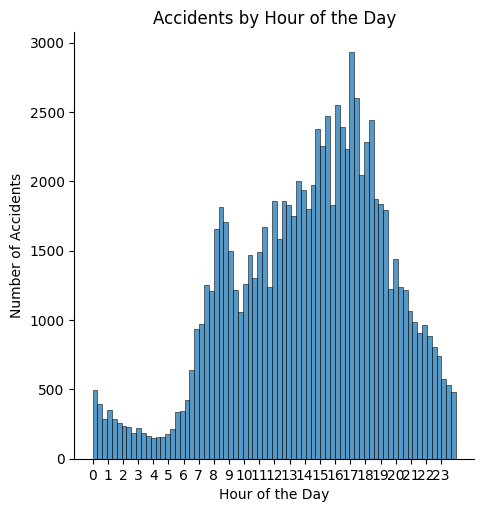

In [154]:
sns.displot(Accident_DataFrame['decimal_time'])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of the Day')
plt.xticks(range(0, 24, 1))

plt.show()


In [155]:
# Define the list of day names in the correct order
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'date' column to datetime using the correct format
Accident_DataFrame['date'] = pd.to_datetime(Accident_DataFrame['date'], format='%d/%m/%Y')

# Extract the day of the week from the 'date' column
Accident_DataFrame['day_of_week'] = Accident_DataFrame['date'].dt.day_name()

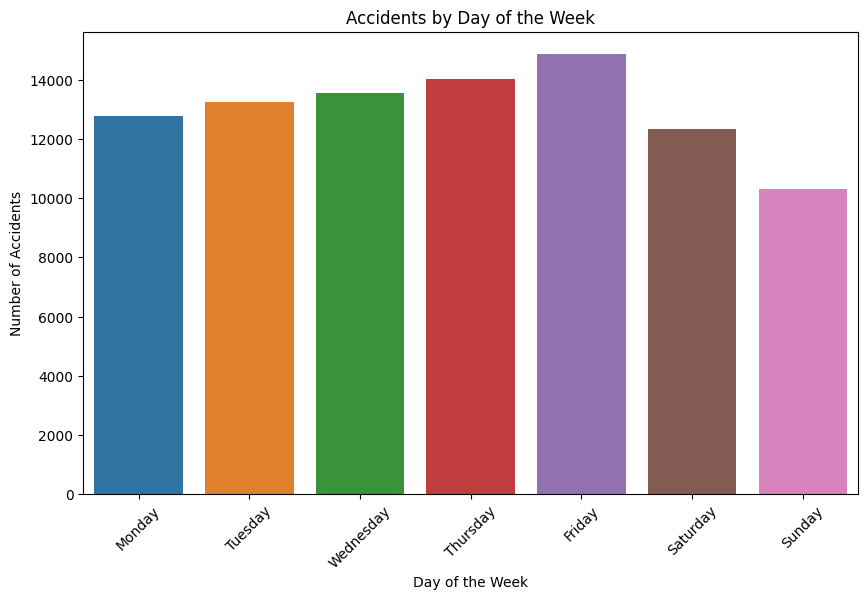

In [156]:
# Create a countplot to visualize accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=Accident_DataFrame, x='day_of_week', order=day_names)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# 3.2 For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc

In [158]:
Motorcycle_125cc_and_under_df = DataFrame[DataFrame ['vehicle_type'] == 3]
Motorcycle_125cc_and_under_df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
14,2020010228020,2020,010228020,529718.0,192342.0,-0.12784,51.614971,1,3,2,...,7,3,0,0,0,0,0,3,1,8
48,2020010228086,2020,010228086,531043.0,176304.0,-0.11468,51.470537,1,3,1,...,5,3,6,9,0,0,0,0,1,2
52,2020010228097,2020,010228097,528428.0,179923.0,-0.150994,51.503659,1,3,2,...,4,3,0,0,0,0,0,3,1,6
78,2020010228148,2020,010228148,518467.0,185248.0,-0.292651,51.553691,1,3,1,...,6,3,5,1,0,0,0,0,1,2
100,2020010228207,2020,010228207,527038.0,170583.0,-0.174362,51.420033,1,3,2,...,5,3,0,0,0,0,0,3,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220033,2020991008618,2020,991008618,340683.0,674031.0,-2.951564,55.955619,99,2,2,...,4,3,0,0,0,0,0,3,2,2
220118,2020991009778,2020,991009778,276790.0,667071.0,-3.971138,55.880977,99,2,2,...,4,2,0,0,0,0,0,3,1,3
220172,2020991010130,2020,991010130,250655.0,658068.0,-4.383591,55.79276,99,3,2,...,8,3,0,0,0,0,0,3,1,5
220318,2020991011809,2020,991011809,268116.0,656638.0,-4.104624,55.785004,99,3,2,...,9,3,0,0,0,0,0,3,1,3


In [159]:
# Define the list of day names in the correct order
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'date' column to datetime using the correct format
Motorcycle_125cc_and_under_df['date'] = pd.to_datetime(Motorcycle_125cc_and_under_df['date'], format='%d/%m/%Y')

# Extract the day of the week from the 'date' column
Motorcycle_125cc_and_under_df['day_of_week'] = Motorcycle_125cc_and_under_df['date'].dt.day_name()

C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\2387225769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Motorcycle_125cc_and_under_df['date'] = pd.to_datetime(Motorcycle_125cc_and_under_df['date'], format='%d/%m/%Y')
C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\2387225769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Motorcycle_125cc_and_under_df['day_of_week'] = Motorcycle_125cc_and_under_df['date'].dt.day_name()


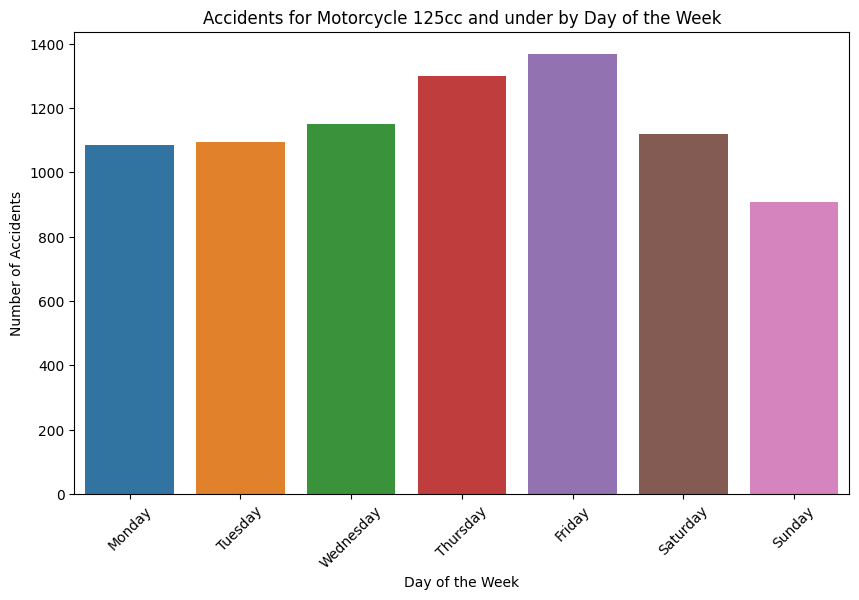

In [160]:
# Create a countplot to visualize accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=Motorcycle_125cc_and_under_df, x='day_of_week', order=day_names)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents for Motorcycle 125cc and under by Day of the Week')
plt.xticks(rotation=45)
plt.show()

In [161]:
# Calculate the count of accidents for each day of the week
day_counts = Motorcycle_125cc_and_under_df['day_of_week'].value_counts().reindex(day_names, fill_value=0)
day_counts

Monday       1084
Tuesday      1095
Wednesday    1151
Thursday     1300
Friday       1368
Saturday     1120
Sunday        908
Name: day_of_week, dtype: int64

C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\805319400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['converted_time'] = pd.DatetimeIndex(i['time'])
C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\805319400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['decimal_time'] = hour + minute / 60


<Figure size 1000x600 with 0 Axes>

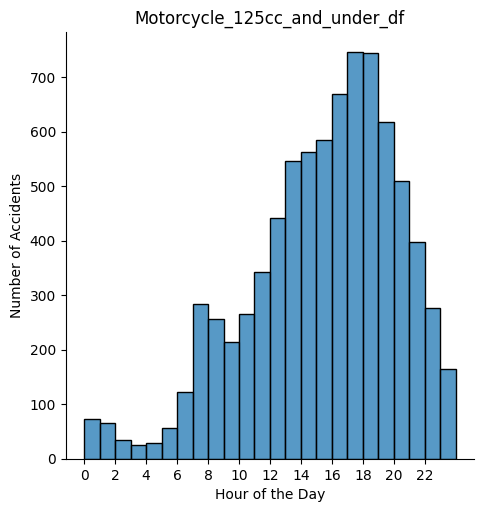

In [162]:
# Apply the function to your data
hours_of_day(Motorcycle_125cc_and_under_df)

# Create the plot for hours of the day
plt.figure(figsize=(10, 6))
sns.displot(data=Motorcycle_125cc_and_under_df, x='decimal_time', bins=24, kde=False)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Motorcycle_125cc_and_under_df')
plt.xticks(range(0, 24, 2))  # Set x-axis ticks for each hour
plt.show()

In [166]:
Motorcycle_125cc_and_upto_500 = DataFrame [DataFrame ['vehicle_type'] == 4]
Motorcycle_125cc_and_upto_500

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
117,2020010228247,2020,010228247,540175.0,190325.0,0.02229,51.594341,1,3,2,...,7,3,0,0,0,0,0,4,1,1
131,2020010228265,2020,010228265,530914.0,171051.0,-0.118477,51.423358,1,3,1,...,6,3,0,0,0,0,0,4,1,5
778,2020010229213,2020,010229213,537758.0,180583.0,-0.016392,51.507395,1,3,2,...,7,3,0,0,0,0,0,4,1,5
901,2020010229461,2020,010229461,525782.0,175011.0,-0.190844,51.460109,1,3,3,...,6,3,0,0,0,0,0,4,1,3
931,2020010229496,2020,010229496,525530.0,176729.0,-0.193861,51.475605,1,3,3,...,4,3,0,0,0,0,0,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219563,2020991003397,2020,991003397,361508.0,862416.0,-2.646571,57.649987,99,2,3,...,10,3,0,0,0,0,0,9,1,2
219564,2020991003397,2020,991003397,361508.0,862416.0,-2.646571,57.649987,99,2,3,...,6,2,0,0,0,0,0,4,1,3
219687,2020991004865,2020,991004865,322240.0,672056.0,-3.246292,55.935244,99,2,2,...,6,2,0,0,0,0,0,4,1,7
219961,2020991008057,2020,991008057,324394.0,672836.0,-3.212041,55.942595,99,3,2,...,7,3,0,0,0,0,0,4,1,7


In [167]:
# Define the list of day names in the correct order
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'date' column to datetime using the correct format
Motorcycle_125cc_and_upto_500['date'] = pd.to_datetime(Motorcycle_125cc_and_upto_500['date'], format='%d/%m/%Y')

# Extract the day of the week from the 'date' column
Motorcycle_125cc_and_upto_500['day_of_week'] = Motorcycle_125cc_and_upto_500['date'].dt.day_name()

C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\887005014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Motorcycle_125cc_and_upto_500['date'] = pd.to_datetime(Motorcycle_125cc_and_upto_500['date'], format='%d/%m/%Y')
C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\887005014.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Motorcycle_125cc_and_upto_500['day_of_week'] = Motorcycle_125cc_and_upto_500['date'].dt.day_name()


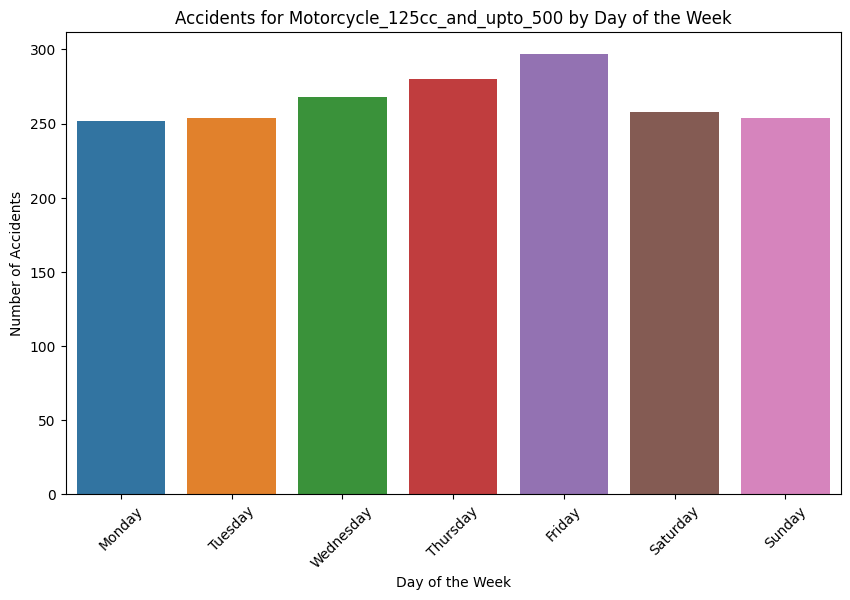

In [168]:
# Create a countplot to visualize accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=Motorcycle_125cc_and_upto_500, x='day_of_week', order=day_names)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents for Motorcycle_125cc_and_upto_500 by Day of the Week')
plt.xticks(rotation=45)
plt.show()

In [169]:
# Calculate the count of accidents for each day of the week
day_counts = Motorcycle_125cc_and_upto_500['day_of_week'].value_counts().reindex(day_names, fill_value=0)
day_counts

Monday       252
Tuesday      254
Wednesday    268
Thursday     280
Friday       297
Saturday     258
Sunday       254
Name: day_of_week, dtype: int64

C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\805319400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['converted_time'] = pd.DatetimeIndex(i['time'])
C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\805319400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['decimal_time'] = hour + minute / 60


<Figure size 1000x600 with 0 Axes>

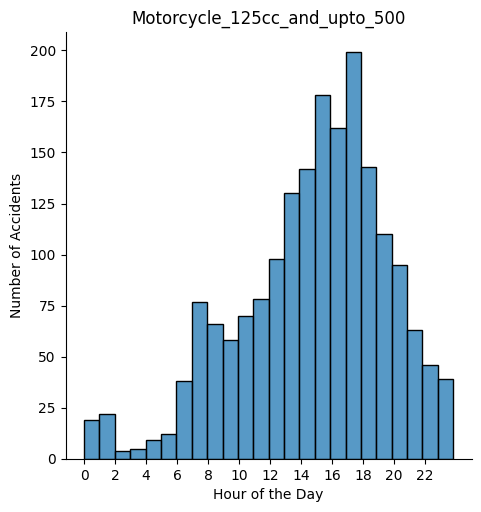

In [170]:
# Apply the function to your data
hours_of_day(Motorcycle_125cc_and_upto_500)

# Create the plot for hours of the day
plt.figure(figsize=(10, 6))
sns.displot(data=Motorcycle_125cc_and_upto_500, x='decimal_time', bins=24, kde=False)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Motorcycle_125cc_and_upto_500')
plt.xticks(range(0, 24, 2))  # Set x-axis ticks for each hour
plt.show()

In [172]:
Motorcycle_500cc_and_over_df = DataFrame [DataFrame ['vehicle_type'] == 5]
Motorcycle_500cc_and_over_df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
144,2020010228283,2020,010228283,524504.0,178619.0,-0.207961,51.492817,1,2,2,...,6,2,0,0,0,0,0,5,1,2
408,2020010228659,2020,010228659,530728.0,187433.0,-0.115087,51.570623,1,3,2,...,8,3,0,0,0,0,0,5,1,2
464,2020010228738,2020,010228738,515249.0,183075.0,-0.339757,51.534826,1,3,4,...,7,3,0,0,0,0,0,5,1,6
493,2020010228796,2020,010228796,530758.0,179386.0,-0.117641,51.4983,1,3,2,...,6,3,0,0,0,0,0,5,1,4
553,2020010228865,2020,010228865,548578.0,178347.0,0.138462,51.484565,1,3,2,...,4,3,0,0,0,0,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219558,2020991003397,2020,991003397,361508.0,862416.0,-2.646571,57.649987,99,2,3,...,6,2,0,0,0,0,0,4,1,3
219576,2020991003505,2020,991003505,326207.0,669768.0,-3.182182,55.915317,99,2,1,...,8,2,0,0,0,0,0,5,1,7
219685,2020991004857,2020,991004857,338547.0,731820.0,-2.999184,56.474464,99,2,2,...,8,2,0,0,0,0,0,5,1,1
220084,2020991009395,2020,991009395,276154.0,663826.0,-3.979814,55.851675,99,3,2,...,8,3,0,0,0,0,0,5,1,8


In [173]:
# Define the list of day names in the correct order
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'date' column to datetime using the correct format
Motorcycle_500cc_and_over_df['date'] = pd.to_datetime(Motorcycle_500cc_and_over_df['date'], format='%d/%m/%Y')

# Extract the day of the week from the 'date' column
Motorcycle_500cc_and_over_df['day_of_week'] = Motorcycle_500cc_and_over_df['date'].dt.day_name()

C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\1153146665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Motorcycle_500cc_and_over_df['date'] = pd.to_datetime(Motorcycle_500cc_and_over_df['date'], format='%d/%m/%Y')
C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\1153146665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Motorcycle_500cc_and_over_df['day_of_week'] = Motorcycle_500cc_and_over_df['date'].dt.day_name()


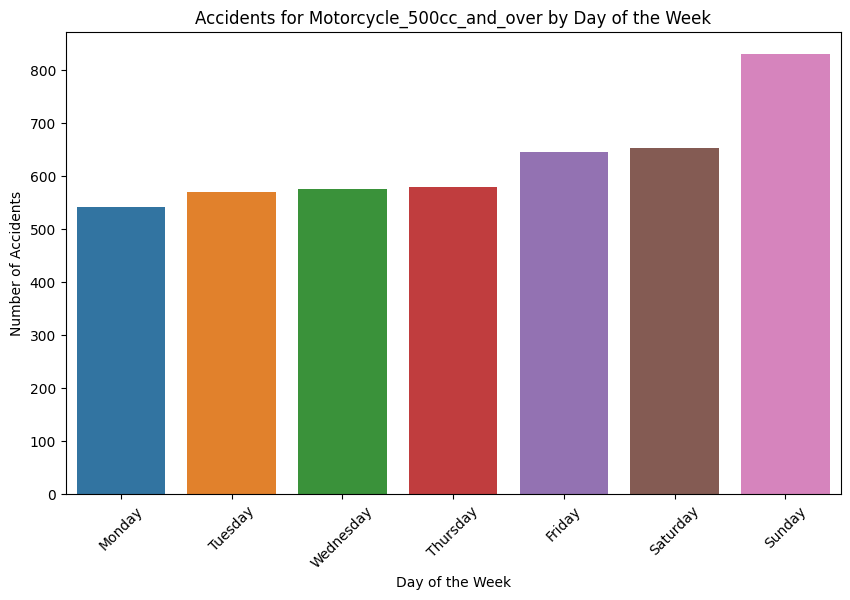

In [174]:
# Create a countplot to visualize accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=Motorcycle_500cc_and_over_df, x='day_of_week', order=day_names)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents for Motorcycle_500cc_and_over by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [175]:
# Calculate the count of accidents for each day of the week
day_counts = Motorcycle_500cc_and_over_df['day_of_week'].value_counts().reindex(day_names, fill_value=0)
day_counts

Monday       542
Tuesday      569
Wednesday    576
Thursday     578
Friday       645
Saturday     653
Sunday       830
Name: day_of_week, dtype: int64

C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\805319400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['converted_time'] = pd.DatetimeIndex(i['time'])
C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\805319400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['decimal_time'] = hour + minute / 60


<Figure size 1000x600 with 0 Axes>

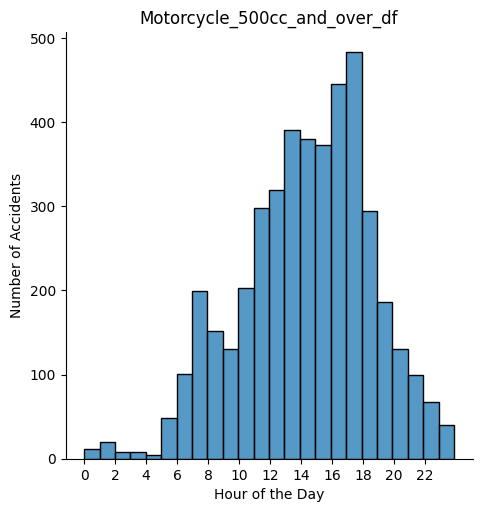

In [176]:
# Apply the function to your data
hours_of_day(Motorcycle_500cc_and_over_df)

# Create the plot for hours of the day
plt.figure(figsize=(10, 6))
sns.displot(data=Motorcycle_500cc_and_over_df, x='decimal_time', bins=24, kde=False)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Motorcycle_500cc_and_over_df')
plt.xticks(range(0, 24, 2))  # Set x-axis ticks for each hour
plt.show()

# 3.3 For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [177]:
DataFrame_pedestrian = DataFrame [DataFrame['casualty_class'] == 3]
DataFrame_pedestrian

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.54121,1,2,1,...,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220418,2020991023621,2020,991023621,341791.0,733677.0,-2.946947,56.491558,99,2,1,...,8,2,8,1,0,0,0,0,1,4
220419,2020991023880,2020,991023880,342979.0,731116.0,-2.927095,56.468699,99,3,1,...,9,3,5,1,0,0,0,0,1,4
220426,2020991024526,2020,991024526,286242.0,717023.0,-3.841439,56.331864,99,3,1,...,10,3,6,9,0,0,0,0,3,7
220429,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,9,3,10,1,0,0,0,0,1,10


In [178]:
# Define the list of day names in the correct order
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'date' column to datetime using the correct format
DataFrame_pedestrian['date'] = pd.to_datetime(DataFrame_pedestrian['date'], format='%d/%m/%Y')

# Extract the day of the week from the 'date' column
DataFrame_pedestrian['day_of_week'] = DataFrame_pedestrian['date'].dt.day_name()

C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\3768387759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame_pedestrian['date'] = pd.to_datetime(DataFrame_pedestrian['date'], format='%d/%m/%Y')
C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\3768387759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame_pedestrian['day_of_week'] = DataFrame_pedestrian['date'].dt.day_name()


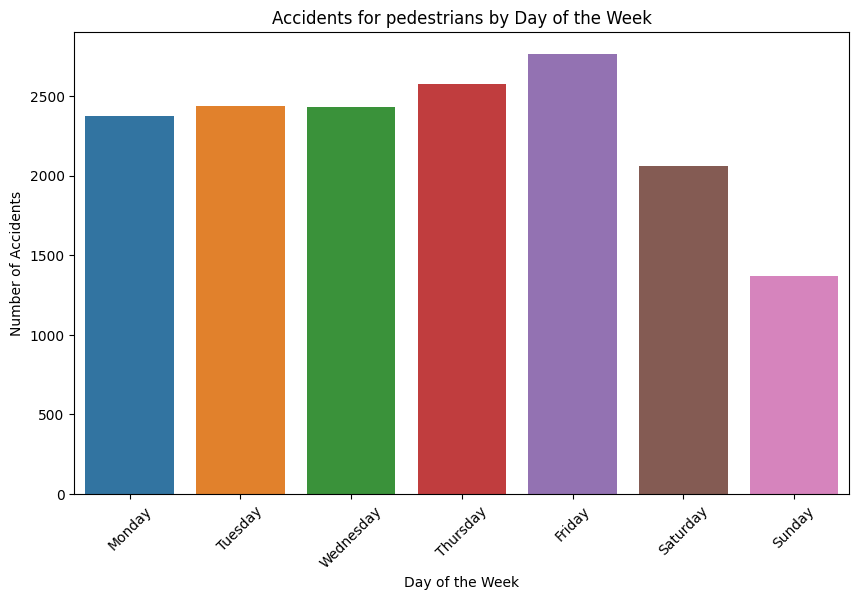

In [179]:
# Create a countplot to visualize accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=DataFrame_pedestrian, x='day_of_week', order=day_names)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents for pedestrians by Day of the Week')
plt.xticks(rotation=45)
plt.show()

In [180]:
day_counts = DataFrame_pedestrian['day_of_week'].value_counts().reindex(day_names, fill_value=0)
day_counts

Monday       2372
Tuesday      2439
Wednesday    2433
Thursday     2577
Friday       2764
Saturday     2059
Sunday       1366
Name: day_of_week, dtype: int64

C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\805319400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['converted_time'] = pd.DatetimeIndex(i['time'])
C:\Users\Asadullah Irshad\AppData\Local\Temp\ipykernel_12132\805319400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['decimal_time'] = hour + minute / 60


<Figure size 1000x600 with 0 Axes>

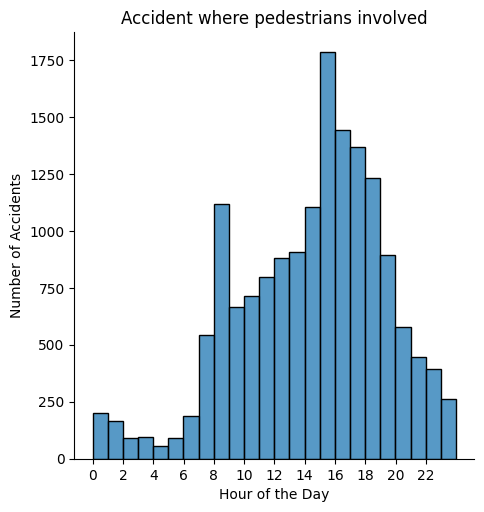

In [181]:
# Apply the function to your data
hours_of_day(DataFrame_pedestrian)

# Create the plot for hours of the day
plt.figure(figsize=(10, 6))
sns.displot(data=DataFrame_pedestrian, x='decimal_time', bins=24, kde=False)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accident where pedestrians involved')
plt.xticks(range(0, 24, 2))  # Set x-axis ticks for each hour
plt.show()

# 3.4 Using the apriori algorithm, explore the impact of selected variables on accident severity.

In [183]:
# Select the variables of interest
variables = ['light_conditions', 'weather_conditions', 'road_type', 'accident_severity']
DataFrame_apriori= DataFrame[variables]
DataFrame_apriori

,light_conditions,weather_conditions,road_type,accident_severity
0,1,9,6,3
1,1,1,6,3
2,1,1,6,3
3,4,1,6,3
4,4,1,6,2
...,...,...,...,...
220430,1,1,6,2
220431,1,1,6,2
220432,1,1,6,3
220433,1,1,6,3


In [184]:
# Convert the variables to string type
df = DataFrame_apriori.astype(str)

# One-hot encode the data
df_encoded = pd.get_dummies(df)
df_encoded

,light_conditions_1,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7,weather_conditions_1,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,...,weather_conditions_9,road_type_1,road_type_2,road_type_3,road_type_6,road_type_7,road_type_9,accident_severity_1,accident_severity_2,accident_severity_3
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
220431,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
220432,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
220433,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [185]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

C:\Users\Asadullah Irshad\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.710604,(light_conditions_1)
1,0.206905,(light_conditions_4)
2,0.054529,(light_conditions_6)
3,0.021027,(light_conditions_7)
4,0.780892,(weather_conditions_1)
...,...,...
137,0.022029,"(road_type_3, accident_severity_3, weather_con..."
138,0.022388,"(accident_severity_2, road_type_6, weather_con..."
139,0.075283,"(accident_severity_3, weather_conditions_1, ro..."
140,0.020968,"(weather_conditions_2, accident_severity_3, ro..."


In [186]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_conditions_1),(light_conditions_1),0.780892,0.710604,0.584240,0.748170,1.052865,0.029335,1.149172,0.229159
1,(light_conditions_1),(weather_conditions_1),0.710604,0.780892,0.584240,0.822174,1.052865,0.029335,1.232147,0.173501
2,(weather_conditions_2),(light_conditions_1),0.126808,0.710604,0.071114,0.560798,0.789186,-0.018997,0.658914,-0.234258
3,(weather_conditions_4),(light_conditions_1),0.015497,0.710604,0.010416,0.672131,0.945859,-0.000596,0.882658,-0.054946
4,(weather_conditions_8),(light_conditions_1),0.027745,0.710604,0.017751,0.639797,0.900357,-0.001965,0.803425,-0.102196
...,...,...,...,...,...,...,...,...,...,...
233,"(weather_conditions_2, road_type_6, light_cond...",(accident_severity_3),0.027110,0.777445,0.020968,0.773427,0.994832,-0.000109,0.982268,-0.005311
234,"(weather_conditions_2, light_conditions_4)","(accident_severity_3, road_type_6)",0.039758,0.549137,0.020968,0.527385,0.960388,-0.000865,0.953975,-0.041184
235,"(light_conditions_6, accident_severity_3, weat...",(road_type_6),0.021684,0.720652,0.016009,0.738285,1.024467,0.000382,1.067372,0.024412
236,"(light_conditions_6, accident_severity_3, road...",(weather_conditions_1),0.025141,0.780892,0.016009,0.636774,0.815444,-0.003623,0.603226,-0.188419


# Clustering

# 3.5 Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 

In [187]:
Accident_DataFrame=pd.read_sql('SELECT * FROM accident join lsoa ON accident.lsoa_of_accident_location=lsoa.lsoa01cd WHERE police_force = 16 AND accident_year >=2020'  ,connect)
Accident_DataFrame.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,1,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
1,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,1,2,E01013325,13325,E01013325,North Lincolnshire 022C,North Lincolnshire 022C,2.922303e+07,35402.961317,7ef78052-d8cd-44b7-83fe-911922ac653e
2,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,1,2,E01012788,12788,E01012788,Kingston upon Hull 002E,Kingston upon Hull 002E,4.380009e+05,4731.122554,3976daa3-b707-42ec-80fd-cc3ee771e32f
3,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,...,1,2,E01013220,13220,E01013220,North East Lincolnshire 003C,North East Lincolnshire 003C,9.608273e+05,7574.743799,3fd9635e-6911-4973-93f9-d797fcda91ae
4,2020160915047,2020,160915047,510322.0,431457.0,-0.327733,53.767805,16,3,1,...,1,2,E01012817,12817,E01012817,Kingston upon Hull 016D,Kingston upon Hull 016D,1.798393e+06,7836.548217,d1883eb3-b8e3-47f3-97ab-f33ce4bad217


In [189]:
Accident_Data=np.array(list(zip(Accident_DataFrame['longitude'],Accident_DataFrame['latitude'])))
Accident_Data

array([[-0.393424, 53.744936],
       [-0.528743, 53.512895],
       [-0.324858, 53.79163 ],
       ...,
       [-0.30888 , 53.78275 ],
       [-0.703181, 53.569801],
       [-0.342063, 53.742609]])

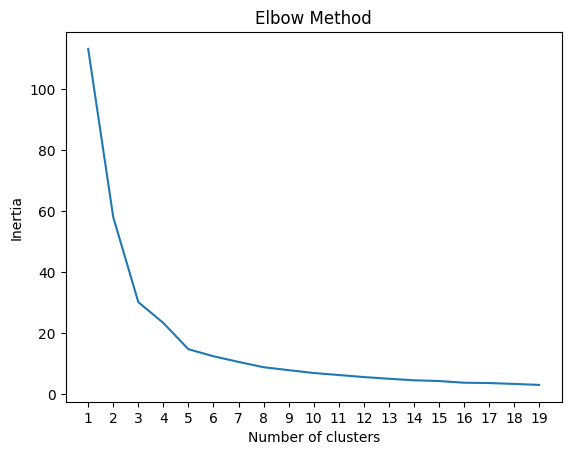

C:\Users\Asadullah Irshad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, ..., 4, 3, 4])

In [190]:
inertia = [] #empty list to store the inertia values of different clusters numbers
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(Accident_Data)
    inertia.append(kmeans.inertia_)
    

# ploting the elbow on my diagram
plt.plot(range(1, 20), inertia)
plt.xticks(range(1, 20))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


kmeans = KMeans(5)
kmeans.fit(Accident_Data)
# getting my cluster labels and setting it to variable
labels = kmeans.labels_
labels

In [191]:
clusters=kmeans.cluster_centers_
clusters

array([[-0.2715766 , 54.0433033 ],
       [-0.8177225 , 53.80799228],
       [-0.09147249, 53.57621063],
       [-0.64717868, 53.58547258],
       [-0.36222849, 53.75941016]])

In [192]:
y_kmeans = kmeans.fit_predict(Accident_Data)
y_kmeans

C:\Users\Asadullah Irshad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 1, 0, 1])

In [193]:
# Create a DataFrame from accident_df and y_kmeans
accident_clusters = pd.DataFrame(Accident_Data, columns=['longitude', 'latitude'])
accident_clusters['cluster'] = y_kmeans
y_kmeans

array([1, 0, 1, ..., 1, 0, 1])

In [194]:
center_lat = Accident_Data[:, 1].mean()
center_lng = Accident_Data[:, 0].mean()

#Create a folium map centered around the mean coordinates
my_map = folium.Map(location=[center_lat, center_lng], zoom_start=10)
my_map

In [195]:
# Define a list of colors for clusters
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'cyan', 'magenta']

In [196]:
# Plot each cluster
for cluster_num, group in accident_clusters.groupby('cluster'):
    color = colors[cluster_num % len(colors)] # Cycle through colors
    for index, row in group.iterrows():
        folium.CircleMarker([row['latitude'], row['longitude']], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6).add_to(my_map)


In [197]:
# Add centroids (if 'clusters' variable is available with centroids)
if 'clusters' in locals():
    for lat, lon in zip(clusters[:, 1], clusters[:, 0]):
        folium.Marker([lat, lon], icon=folium.Icon(color='red', icon='star')).add_to(my_map)


In [198]:

# Display the map
my_map

# 4.0 OUTFITTING

# 4.1 Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?

In [388]:
Area=DataFrame[['longitude', 'latitude']]

In [389]:
DataFrame.dropna(subset=['longitude', 'latitude'], inplace=True)

C:\Users\Asadullah Irshad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


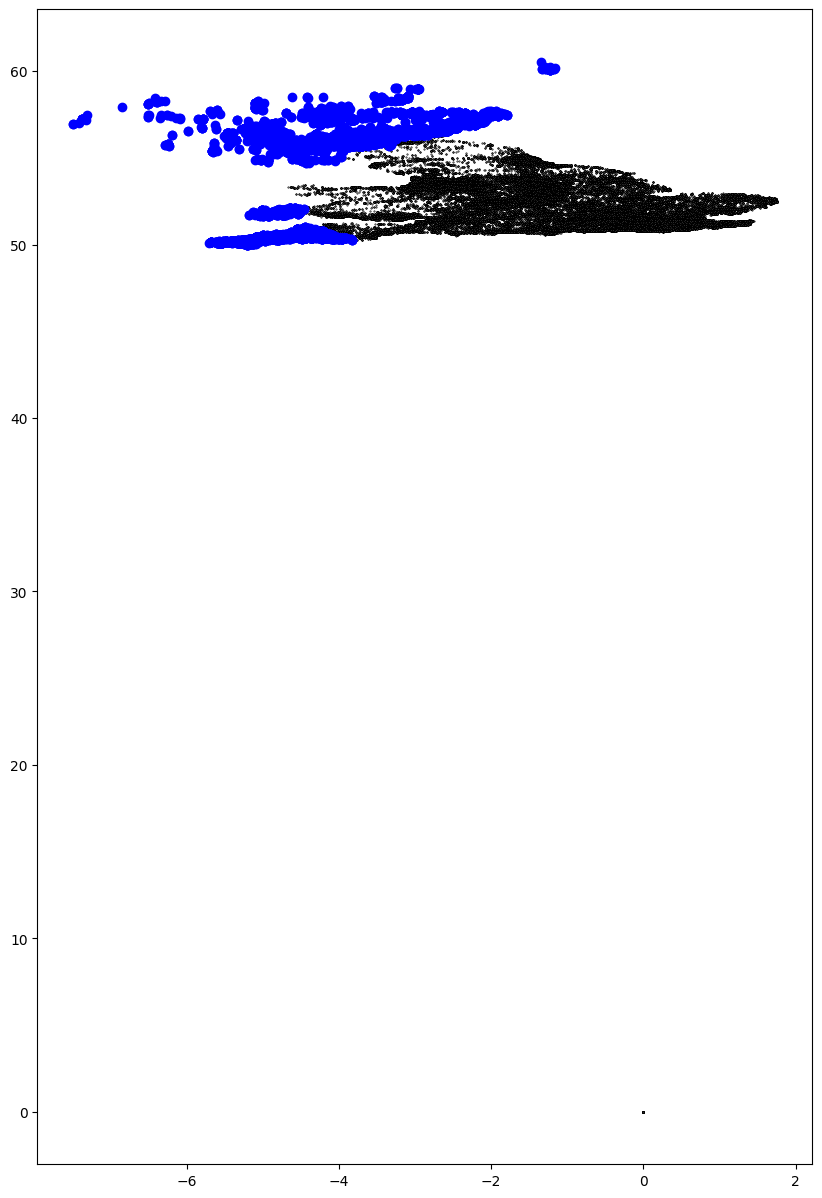

In [201]:
# Create feature matrix X
X = DataFrame[['longitude', 'latitude']]

# Initialize Isolation Forest model
ranst = np.random.RandomState(0)
model = IsolationForest(max_samples=100, random_state=ranst, contamination=0.05)

# Fit the model to the data
model.fit(X)

# Identify anomalies
if_anomalies = X[model.predict(X) == -1]

# Plot the results
plt.figure(figsize=(10, 15))
plt.scatter(X['longitude'], X['latitude'], c='white', s=0.2, edgecolors='k')
plt.scatter(if_anomalies['longitude'], if_anomalies['latitude'], c='blue')
plt.show()

# 5.0 MODELLING

# 5.1 Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

False    216204
True       4231
Name: accident_severity, dtype: int64


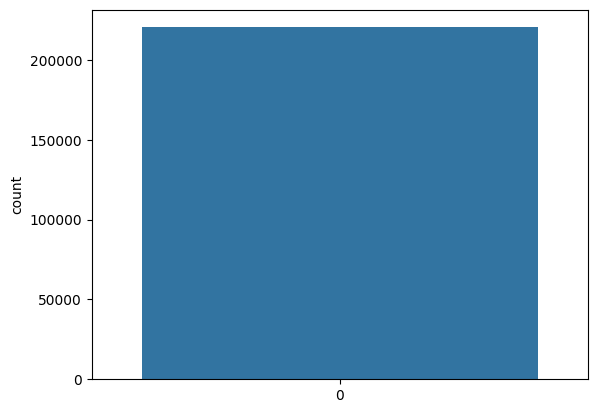

C:\Users\Asadullah Irshad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 26 51] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Asadullah Irshad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Create binary labels for accident severity
y_labels = DataFrame['accident_severity'] == 1

# Display value counts of the label
print(y_labels.value_counts())

# Plot count of label values
sns.countplot(y_labels)
plt.show()

# Perform random under-sampling to balance the dataset
rus = RandomUnderSampler()
bal_DataFrame, y_balanced = rus.fit_resample(DataFrame, y_labels)

# Drop columns from the balanced DataFrame
bal_DataFrame.drop(columns=['accident_severity', 'did_police_officer_attend_scene_of_accident'], inplace=True)

# Select numerical features
bal_DataFrame = bal_DataFrame.select_dtypes([np.number])

# Feature selection using SelectKBest with f_classif score
selector = SelectKBest(f_classif, k=10)
selector.fit(bal_DataFrame, y_balanced)

# Get selected feature mask, names, and scores
mask = selector.get_support()
names = bal_DataFrame.columns[mask]
scores = selector.scores_[mask]

# 5.2 Data Interpretation

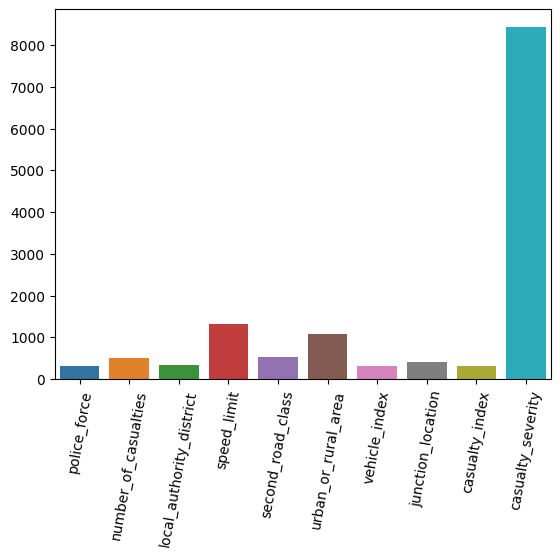

In [381]:
# Plot selected feature scores
sns.barplot(x=names, y=scores)
plt.xticks(rotation=80)
plt.show()

In [382]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(bal_DataFrame, y_balanced, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation on the Random Forest classifier
result_forest = cross_validate(forest, X_train, y_train, cv=10, scoring='accuracy', return_estimator=True)

# Access the fitted classifiers from cross-validation results
fitted_forests = result_forest['estimator']

# Predict on the test set using each fitted forest
predicted_labels = [forest.predict(X_test) for forest in fitted_forests]

# Calculate majority vote for each sample
final_predicted_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predicted_labels)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, final_predicted_labels)

# Print the confusion matrix
print(confusion)

[[813  25]
 [ 39 816]]


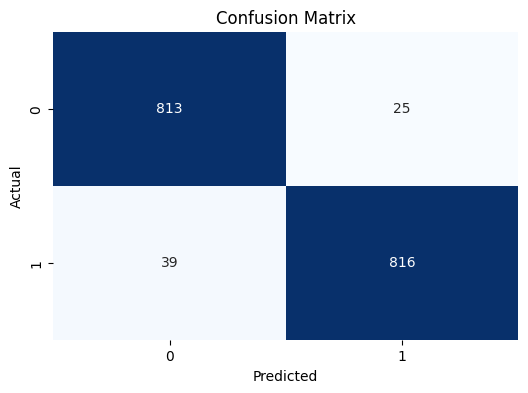

In [383]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [384]:
true_positives = confusion[1, 1]
true_negatives = confusion[0, 0]
false_positives = confusion[0, 1]
false_negatives = confusion[1, 0]

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

print("Accuracy:", accuracy)

Accuracy: 0.9621972829297105


In [385]:
accuracy_percentage = round(accuracy * 100, 2)
print("Accuracy:", accuracy_percentage, "%")

Accuracy: 96.22 %
